# 7. 워드 임베딩

## 7-1. 들어가며

안녕하세요. 👋
오늘은 자연어 처리에서 단어를 벡터화하는 방법 중 하나인 워드 임베딩에 대해서 배워보겠습니다.

기계는 텍스트보다 수치화된 숫자를 더 잘 처리할 수 있습니다. 이런 이유로 기계가 자연어 처리를 원활히 할 수 있도록, 전처리 과정에서 텍스트를 벡터로 변환하는 벡터화(Vectorization) 라는 과정을 거치게 됩니다. 그렇다면 텍스트를 벡터화하는 방법에는 어떤 방법이 있는지 정리해볼까요?

### 학습 내용
---
1. 벡터화
- 텍스트를 벡터화하는 방법을 학습합니다.
2. 벡터화 실습: 원-핫 인코딩 구현해 보기
- 원-핫 인코딩을 구현합니다.
3. 워드 임베딩
- 희소 벡터라의 특징과 문제점을 학습합니다.
4. Word2Vec (1) 분포 가설
- 분포 가설을 학습합니다.
5. Word2Vec (2) CBoW
- CBoW(Continuous Bag of words)에 대해서 학습합니다.
6. Word2Vec (3) Skip-gram과 Negative Sampling
- Skip-gram에 대해서 학습합니다.
7. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제
- OOV(Out Of Vocabuary) 문제에 대해서 학습합니다.
8. 임베딩 벡터의 시각화
- 임베딩 벡터들을 시각화합니다.
9. FastText
- FastText 원리를 학습합니다.
10. GloVe
- GloVe 원리를 학습합니다.

### 학습 목표
---
- 원-핫 인코딩을 구현할 수 있습니다.
- CBoW, Skip-gram 두 가지 방법을 설명할 수 있습니다.
- 네거티브 샘플링(Negative Sampling)이 무엇인지 설명할 수 있습니다.
- FastText, GloVe 특징을 설명할 수 있습니다.


## 7-2. 벡터화

### Bag of words / DTM(Document-Term Matrix)
---
먼저 Bag of words 는 단어의 순서를 고려하지 않고, 단어의 등장 빈도(frequency)만을 고려해서 단어를 벡터화하는 방법입니다. 아래의 짧은 영상을 통해 Bag of words를 잠시 알아보겠습니다.

https://youtu.be/dKYFfUtij_U

굉장히 쉽죠? 용어 정리를 위한 과정이니 이미 알고 계시는 내용이라도 천천히 따라와 주세요! Bag of words를 사용하여 문서 간 유사도를 비교하기 위한 행렬을 만들면, 이를 DTM(문서 단어 행렬, Document-Term Matrix) 이라고 합니다. 문서를 행으로, 단어를 열로 구성한 행렬이죠.

다음과 같은 문서 3개가 있다고 해 볼까요?

- 문서1 : you know I want your love
- 문서2 : I like you
- 문서3 : what should I do

bag of words 방법을 사용할 때는 주로 불필요한 단어를 제거하거나 표현은 다르지만 같은 단어를 통합시켜주는 정규화와 같은 전처리를 합니다. bag of words는 단어를 카운트하는 방법론이기 때문에 불필요한 카운트는 미리 배제하는 것이 좋기 때문입니다. 여기서는 간단히 길이가 1인 단어를 제거하는 전처리를 했다고 가정해보겠습니다. 완성된 DTM은 아래와 같습니다!

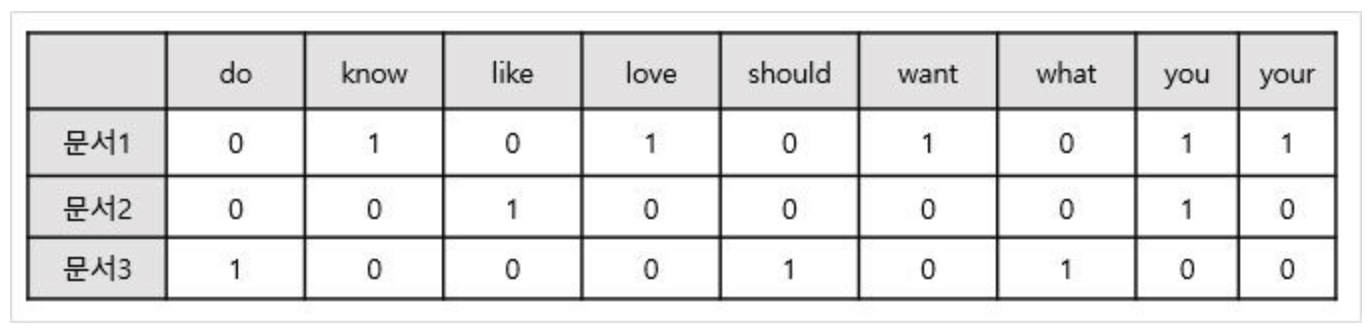


DTM의 행을 문서 벡터, 열을 단어 벡터라고 볼 수 있습니다. 이때, DTM의 문서 벡터나 단어 벡터는 대부분의 값이 0이라는 특징을 가지고 있는데, 이런 벡터를 희소 벡터(sparse vector) 라고 합니다. 문서의 수나 단어의 수가 많아질수록 행렬에서 대부분의 값이 0이 되는 희소 문제는 점점 심화된다는 특징이 있습니다. 희소 벡터가 문제가 되는 이유는 이후에 자세히 설명하겠습니다.

한 가지 용어를 더 정의해 볼게요. DTM에서 열의 개수는 전체 텍스트에서 한 번이라도 등장한 단어의 개수입니다. you란 단어는 문서1과 문서2에 둘 다 등장했지만, 단어 you에 대한 열이 2개 있지는 않습니다. 이렇게 중복 카운트는 배제한 단어들의 집합(set)을 자연어 처리에서는 단어장(vocabulary) 이라고 합니다. 출처에 따라서는 사전, 또는 단어 집합이라고도 불리는데요, 이번 챕터에서는 단어장의 크기를 V 라고 정의할 것입니다. 즉, V는 전체 텍스트에서 한 번이라도 등장한 중복을 제거한 단어의 개수인 것이죠. 위의 DTM의 예제에서 V는 9입니다. 열의 개수가 9니까요.

자, 희소 벡터 와 단어장 이라는 개념을 잘 기억해두세요!


### TF-IDF
---
DTM을 이용해서 문서의 유사도를 비교하는 경우를 생각해 봅시다. 두 문서에서 공통적으로 등장하는 단어가 많으면 그 두 문서는 유사하다고 판단하면 됩니다. 그런데 이 방법은 문제가 있습니다. 별로 중요하지도 않은 단어인데도 모든 문서에서 공통적으로 등장하는 단어가 있다는 것입니다.

가령 영어 단어 'the'는 관사로 거의 모든 문서에서 많이 등장하지만 'the'가 등장하는 모든 문서가 유사도가 높다고 할 수는 없죠. 그래서 단어마다 중요 가중치를 다르게 주는 방법인 TF-IDF가 등장했습니다. 아래 영상을 통해서 TF-IDF에 대해 알아보겠습니다.

https://youtu.be/meEchvkdB1U

TF-IDF와 DTM과의 차이에 대해 아시겠나요? 하지만 TF-IDF와 DTM이 가지는 공통점도 있어요. 그게 무엇인가요?

네! 맞아요. TF-IDF를 사용한다고 하더라도, 여전히 문서 벡터의 크기가 단어장 의 크기인 V이고, 문서 벡터와 단어 벡터 둘 다 여전히 희소 벡터 라는 겁니다.


### 원-핫 인코딩(one-hot encoding)
---
모든 단어의 관계를 독립적으로 정의하는 원-핫 인코딩이라는 방식도 있습니다. 원-핫 인코딩을 하기 위해서는 우선 갖고 있는 텍스트 데이터에서 단어들의 집합인 단어장(vocabulary) 을 만듭니다. 그 후 단어장에 있는 모든 단어에 대해서 1부터 V까지 고유한 정수를 부여합니다. 이 정수는 단어장에 있는 각 단어의 일종의 인덱스 역할을 합니다. 각 단어는 V차원의 벡터로 표현되는데, 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터가 됩니다. 말로만 들으니까 어렵죠? 예를 들어볼까요? 다음과 같이 문서 3개가 있다고 해 볼게요.

- 문서 1 : 강아지, 고양이, 강아지
- 문서 2 : 애교, 고양이
- 문서 3 : 컴퓨터, 노트북

이 코퍼스를 가지고 단어장을 만들면 단어장의 크기는 5입니다. 단어장은 단어의 중복은 허용하지 않는 집합이니까요. 이제 단어장에 있는 각 단어에 제가 임의로 고유한 정수를 부여해보겠습니다.

- 강아지 : 1번
- 고양이 : 2번
- 애교 : 3번
- 컴퓨터 : 4번
- 노트북 : 5번

숫자 부여에 정해진 규칙은 없지만 관례적으로는 빈도수가 높은 단어들부터 낮은 숫자를 부여해요. 가장 많이 등장하는 단어는 1부터 부여하는 식이죠. 이렇게 하면 아주 큰 정수가 부여된 단어는 빈도수가 아주 낮은 단어라는 뜻이고, 그 단어는 중요하지 않은 단어일 확률이 높습니다. 그러므로 추가적인 전처리로 정수가 아주 큰 숫자는 그냥 단어장에서 제거해버리는 선택을 할 수도 있습니다.

각 단어에 고유한 정수를 부여했다면, 각 단어를 V차원의 벡터로 표현해볼게요. 주의할 점은 해당 단어의 정수 위치에만 1의 값을 가지고 나머지 위치에는 0의 값을 가져야 한다는 겁니다.

- 강아지 : [1, 0, 0, 0, 0]
- 고양이 : [0, 1, 0, 0, 0]
- 애교 : [0, 0, 1, 0, 0]
- 컴퓨터 : [0, 0, 0, 1, 0]
- 노트북 : [0, 0, 0, 0, 1]

위와 같이 원-핫 인코딩을 통해 얻은 벡터를 원-핫 벡터(one-hot vector) 라고 합니다. 여기서는 정수를 1부터 부여한다고 가정했지만, 실제로는 0번 단어를 사용하기도 하고, 인덱스도 0번부터 시작하기도 한답니다.

> TF(Term Frequency)란 문장을 구성하는 단어들의 원-핫 벡터들을 모두 더해서 문장의 단어 개수로 나눈 것과 같습니다.

## 7-3. 벡터화 실습: 원-핫 인코딩 구현해보기

Step 1. 패키지 설치하기

직접 파이썬을 통해서 원-핫 인코딩을 구현해보겠습니다.
한국어로 실습하기 위해서 한국어 형태소 분석기 패키지 KoNLPy가 필요한데, cloud 사용자는 이미 설치되어 있으니 명령어만 참고로 알아두세요.

> pip install konlpy

실습에 필요한 도구들을 임포트합니다.

In [3]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-07-04 04:58:35--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2024-07-04 04:58:35--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf3c029169e96769a427dc9610e.dl.dropboxusercontent.com/cd/0/inline/CWBnMpvRz1IL2M9R3i6CXzcJr3045TYziPHB9-0WKml4gV6WWCpVn7P7eTXdRyBSJCaO-RB_xojPXippudrYhyuY8m1h5B47p1iFgCz5hWI7jYeLijmMjSIbngpj2MjxtG15Rx_iVU7kkjYSR3Ti88oS/file?dl=1# [following]
--2024-07-04 04:58:35--  https://ucf

mecab-0.996-ko-0.9.2/src/nbest_generator.cpp
mecab-0.996-ko-0.9.2/src/iconv_utils.h
mecab-0.996-ko-0.9.2/src/connector.cpp
mecab-0.996-ko-0.9.2/src/Makefile.in
mecab-0.996-ko-0.9.2/src/scoped_ptr.h
mecab-0.996-ko-0.9.2/Makefile.in
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... none
checking for 

checking if g++ supports template <class T> (required)... yes
checking if g++ supports GCC native atomic operations (optional)... yes
checking if g++ supports OSX native atomic operations (optional)... no
checking if g++ environment provides all required features... yes
configure: creating ./config.status
config.status: creating Makefile
config.status: creating src/Makefile
config.status: creating src/Makefile.msvc
config.status: creating man/Makefile
config.status: creating doc/Makefile
config.status: creating tests/Makefile
config.status: creating swig/version.h
config.status: creating mecab.iss
config.status: creating mecab-config
config.status: creating mecabrc
config.status: creating config.h
config.status: config.h is unchanged
config.status: executing depfiles commands
config.status: executing libtool commands
config.status: executing default commands
make  all-recursive
make[1]: Entering directory '/tmp/mecab-0.996-ko-0.9.2'
Making all in src
make[2]: Entering directory '/tmp/m

model-ipadic.c1.0.f1.dic/pos-id.def is not found. minimum setting is used
reading model-ipadic.c1.0.f1.dic/dic.csv ... 4335
emitting double-array: 100% |###########################################| 
reading model-ipadic.c1.0.f1.dic/matrix.def ... 346x346
emitting matrix      : 100% |###########################################| 

done!


              precision          recall         F
LEVEL 0:    12.8959(57/442) 11.8998(57/479) 12.3779
LEVEL 1:    12.2172(54/442) 11.2735(54/479) 11.7264
LEVEL 2:    11.7647(52/442) 10.8559(52/479) 11.2921
LEVEL 4:    11.7647(52/442) 10.8559(52/479) 11.2921
PASS: run-cost-train.sh
All 3 tests passed
make[2]: Leaving directory '/tmp/mecab-0.996-ko-0.9.2/tests'
make[1]: Leaving directory '/tmp/mecab-0.996-ko-0.9.2/tests'
make[1]: Entering directory '/tmp/mecab-0.996-ko-0.9.2'
make[1]: Leaving directory '/tmp/mecab-0.996-ko-0.9.2'
Making install in src
make[1]: Entering directory '/tmp/mecab-0.996-ko-0.9.2/src'
make[2]: Entering directory '/tmp/mecab-0.996-ko-0.9.2/src'
test -z "/usr/local/lib" || /usr/bin/mkdir -p "/usr/local/lib"
 /bin/bash ../libtool   --mode=install /usr/bin/install -c   libmecab.la '/usr/local/lib'
libtool: install: /usr/bin/install -c .libs/libmecab.so.2.0.0 /usr/local/lib/libmecab.so.2.0.0
libtool: install: (cd /usr/local/lib && { ln -s -f libmecab.so.2.0.0 libmeca

mecab-ko-dic-2.1.1- 100%[===================>]  47.47M   150MB/s    in 0.3s    

2024-07-04 04:59:07 (150 MB/s) - ‘mecab-ko-dic-2.1.1-20180720.tar.gz?dl=1’ saved [49775061/49775061]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11.1).
autoconf set to manually installed.
The following packages were automatically installed and are no longer required:
  accountsservice-ubuntu-schemas bc bluez-obexd cups cups-browsed cups-client
  cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-ppdc cups-server-common
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gir1.2-dbusmenu-glib-0.4 gnome-bluetooth gnome-power-manager
  gnome-screensaver gsettings-ubuntu-schemas gvfs-backends indicator-applet
  indicator-application indicator-appmenu indicator-bluetooth indicator-common
  indicator-datetime indicator-keyboard indicator-messages i

In [4]:
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


아래와 같이 전처리와 토큰화가 전혀 되어 있지 않은 텍스트가 있다고 해봅시다.





In [5]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

Step 2. 전처리 이야기

이 텍스트에는' !, ~, . '와 같은 각종 특수문자들이 있습니다. 상황에 따라 다르겠지만, 대개 이런 특수문자들은 자연어 처리에서 큰 의미를 가지지 못합니다. 여기서는 정규 표현식을 사용하여 특수문자들을 제거하고자 합니다.

한글과 공백을 제외하고 특수문자만 제거하고 싶다면 어떤 정규 표현식을 사용하면 될까요? 이를 수행하기 위해서는 정규 표현식으로 한국어의 범위를 지정할 수 있어야 합니다. 일반적으로 자음의 범위는 'ㄱ ~ ㅎ', 모음의 범위는 'ㅏ ~ ㅣ'와 같이 지정할 수 있습니다. 해당 범위 내에 어떤 자음과 모음이 속하는지 알고 싶다면 아래의 링크를 참고하시기 바랍니다.

- Hangul Compatibility Jamo (https://www.unicode.org/charts/PDF/U3130.pdf)

또한 완성형 한글의 범위는 '가 ~ 힣'과 같이 사용합니다. 해당 범위 내에 포함된 음절들은 아래의 링크에서 확인할 수 있습니다.

- Hangul Syllables (https://www.unicode.org/charts/PDF/UAC00.pdf)

이를 응용하면, 한글과 공백을 제외하고 모든 문자를 표현하는 정규 표현식은 결국 아래와 같습니다.

한글, 공백을 제외한 모든 문자를 표현하는 regex : [^ㄱ-ㅎㅏ-ㅣ가-힣 ]
이 정규 표현식을 반영하여 전처리를 수행해보겠습니다.

In [6]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


정상적으로 특수문자가 제거된 것을 볼 수 있습니다!

Step 3. 토큰화 이야기

단어장을 구성하기 위해서는 단어장의 원소인 토큰(token)이라는 단위를 정해줄 필요가 있습니다. 그리고 한국어는 주로 형태소 분석기를 통해서 토큰 단위를 나눠줍니다. 여기서는 KoNLPy에 내장된 Okt 형태소 분석기를 사용해보겠습니다.

- 참고: KoNLPy Okt (https://konlpy.org/en/latest/api/konlpy.tag/#okt-class)

In [7]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


형태소 분석기를 통해 토큰들이 분리가 되었습니다.



Step 4. 단어장 만들기

이제 이 토큰들을 가지고 단어장을 만들어 볼 텐데요. 여기서는 빈도수가 높은 단어일수록 낮은 정수를 부여하려고 합니다. 빈도수가 높은 순서대로 낮은 정수를 부여하기 위해서 각 단어의 빈도수를 카운트 할 필요가 있겠죠? 여기서는 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트해 보겠습니다.

- 참고: 파이썬 collections.Counter(https://docs.python.org/3/library/collections.html#collections.Counter)

In [8]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


단어가 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어 있네요. vocab에 단어를 입력하면 빈도수를 리턴합니다. '임금님'이 몇 번 등장했는지 빈도수를 출력해 볼까요?

In [9]:
vocab['임금님']

2

'임금님'이란 단어가 총 2번 등장했네요. most_common()는 상위 빈도수를 가진 단어를 주어진 수만큼 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼 얻을 수 있습니다. 등장 빈도 수 상위 5개의 단어만 단어장으로 저장해 볼게요.

In [10]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


빈도수 상위 5개의 단어만 남아 있는 것을 확인할 수 있습니다! 이제 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여해 볼까요?

In [11]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


이제 각 단어에 고유한 정수를 부여하는 작업이 끝났습니다! 이제 word2idx를 최종 단어장으로 사용할게요.



Step 5: 원-핫 벡터 만들기

이제 원-핫 인코딩을 하는 함수를 만들어 각 단어를 원-핫 벡터로 만들어볼게요. 아래의 함수는 특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수에요.

In [12]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index-1] = 1
       return one_hot_vector
print("슝=3")

슝=3


In [13]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

케라스를 통한 원-핫 인코딩(one-hot encoding)

원-핫 인코딩을 지원하는 패키지는 여러 가지가 있는데 여기서는 텐서플로의 케라스 API를 사용해볼 거에요. 우선 필요한 도구들을 임포트 해 보죠. 여기서는 단어장을 만드는 역할을 해주는 케라스 Tokenizer와 원-핫 인코딩을 위한 도구인 to_categorical을 사용합니다.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
print("임포트 완료")

임포트 완료


위에서 예로 들었던 3개의 문서를 text에 저장합니다.





In [15]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

케라스 토크나이저를 사용하면 주어진 텍스트로부터 단어장을 만들고, 단어장의 각 단어에 고유한 정수를 맵핑해 줍니다.





In [16]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


위의 결과는 각 단어에 고유한 정수가 맵핑되었음을 보여줍니다. 이제 단어장의 크기를 vocab_size라는 변수에 저장해두겠습니다.

In [17]:
vocab_size = len(t.word_index) + 1
print("슝=3")

슝=3


vocab_size를 구할 때 1을 더해주는 이유는, 실제로 자연어 처리를 할 때는 0번 단어가 특별 토큰으로 단어장에 추가되는 경우가 많기 때문입니다. 주로 0번은 패딩(padding) 작업을 위한 패딩 토큰으로 사용되는데, 여기서는 0번 단어도 고려해주는 것이 좋다는 정도로만 이해하고 word_index에 1을 더해서 단어장의 크기를 저장하겠습니다. 이제 vocab_size는 6이 되었습니다.

케라스 토크나이저에 단어장이 저장되었으므로, 단어장에 속한 단어들로 구성된 텍스트 시퀀스는 케라스 토크나이저를 통해 정수 시퀀스로 변환할 수 있습니다.

In [18]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


위의 결과는 텍스트 시퀀스가 정수 시퀀스로 변환되는 것을 보여줍니다. 앞에서 강아지는 1번, 고양이는 2번, 컴퓨터는 4번으로 정수가 부여되었습니다. 이렇게 변환된 정수 시퀀스는 to_categorical()을 사용해 원-핫 벡터의 시퀀스로 변환할 수 있습니다.

In [19]:
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


각 단어가 단어장의 크기인 6차원의 벡터로 변환된 것을 확인할 수 있습니다.


## 7-4. 워드 임베딩

### 희소 벡터(Sparse Vector)의 문제점
---
DTM, TF-IDF, 원-핫 벡터는 단어장의 크기에 영향을 받는 희소 벡터(sparse vector) 라는 특징을 가지고 있습니다. 원-핫 인코딩의 경우 단어장의 크기가 30,000이라면, 30,000개의 모든 단어 벡터는 각각 30,000 차원의 벡터가 되죠. 그런데 이 벡터들은 하나의 원소만 1이고 29,999개의 원소가 0의 값을 가집니다. 눈치가 빠른 분들은 이런 점이 문제가 될 수 있다는 생각이 드실 거예요.

> Sparse라는 말은 아마도 Sparse matrix에서 시작된 말인 것 같은데요. 행렬 값이 대부분 0인 경우를 특별히 지칭하기 위해서 사용됩니다. 행렬 값이 얼마나 많이 0이어야 sparse하다고 할 것인가와 같은 정의는 없습니다. 이 sparse 개념을 vector로 끌어와 0이 많은 vector를 sparse vector라고 부릅니다. 그걸 희소 벡터라고 번역을 했고요.

희소 벡터에는 차원의 저주(curse of dimensionality) 라는 문제가 있습니다. 차원의 저주를 이해하기 위해서 직관적인 이야기로 시작해 볼게요. 같은 정보를 저차원과 고차원에 각각 표현한다고 해 보죠. 저차원에서는 정보의 밀도가 상대적으로 커지지만, 고차원에서는 정보가 흩어지며 밀도가 작아질 거예요. 아래의 그림은 이를 시각화하여 보여주고 있습니다.

정보 밀도가 작아지는 것, 즉 차원이 커지는 것과 머신 러닝 모델의 성능에는 어떤 연관 관계가 있습니다. 차원의 저주에 대해서는 아래 참고자료를 통해 개념을 정리해 봅시다.

- 빅데이터: 큰 용량의 역습 – 차원의 저주 (Curse of dimensionality) (https://thesciencelife.com/archives/1001)

원-핫 벡터가 가지는 문제점은 또 있습니다. 사람은 직관적으로 '강아지'와 '고양이'라는 두 단어의 의미적 유사성이 '강아지'와 '컴퓨터'라는 두 단어의 의미적 유사성보다는 높다고 판단할 수 있습니다. '강아지'와 '고양이'는 귀여운 애완동물이고, '컴퓨터'는 데이터를 처리하는 전자기기로 분류할 수 있기 때문입니다. 하지만 원-핫 벡터는 이를 반영하지 못합니다.

벡터 간 유사도를 구하는 방법으로는 대표적으로 내적(inner product)이 있습니다. 임의의 두개의 원-핫 벡터 간 내적(inner product)을 구해보면, 대부분 서로 직교(orthogonal)하여 그 값은 0입니다. 이는 거의 모든 원-핫 벡터의 상호 유사도가 0임을 의미하며. 결국 원-핫 벡터를 통해서는 단어 벡터 간 유사도를 구할 수 없음을 의미합니다.

기계가 단어 벡터 간 유사도를 구할 수 없다는 점은 오랫동안 자연어 처리의 걸림돌이었습니다. 어떤 사람이 '톺아보다'라는 생소한 단어를 배웠고, '톺아보다'가 '샅샅이 살펴보다'와 유사한 의미임을 학습했다고 해보죠. 그 사람은 이제 '발표 자료를 살펴보다'라는 문장을 '발표 자료를 톺아보다'라는 문장으로 어려움 없이 수정할 수 있습니다. 비록 '발표 자료를 톺아보다'라는 예문을 어디서 읽은 적이 없더라도, 의미적 유사성에 대한 이해를 통해 새로운 자연어를 생성한 셈입니다. 하지만 단어 벡터 간 유사도를 구할 수 없는 기계는 이와 같이 관측하지 못한 문장에 대해서 유연하게 대처할 수 없었습니다.

이에 대한 대안으로 '기계가 단어장 크기보다 적은 차원의 밀집 벡터(dense vector)를 학습'하는 워드 임베딩(word embedding) 이 제안되었습니다. 이를 통해 얻는 밀집 벡터는 각 차원이 0과 1이 아닌 다양한 실숫값을 가지며, 이 밀집 벡터를 임베딩 벡터(embedding vector) 라고 합니다.


### 워드 임베딩(Word Embedding)
---
워드 임베딩에서도 한 단어를 벡터로 바꿉니다. 그런데 그 벡터의 길이를 일정하게 정해줍니다. 더 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않습니다. 여기서 일반적으로 벡터의 길이가 단어장 크기보다 매우 작기 때문에 각 벡터 값에 정보가 축약되어야 하고 결국 밀집 벡터(dense vector) 가 됩니다.

밀집 벡터는 희소 벡터가 가진 특성을 반대로 표현하고 싶어서 만들어진 말인데요. 대부분 값이 0인 희소 벡터와는 반대로 밀집 벡터에서는 대부분 값이 0이 아닙니다. 또 희소 벡터에서는 각 벡터 값의 의미가 True/False나 갯수처럼 단순했다면 밀집 벡터에서는 각 벡터 값의 의미가 파악하기 어려울 정도로 많은 의미를 함축하고 있죠.

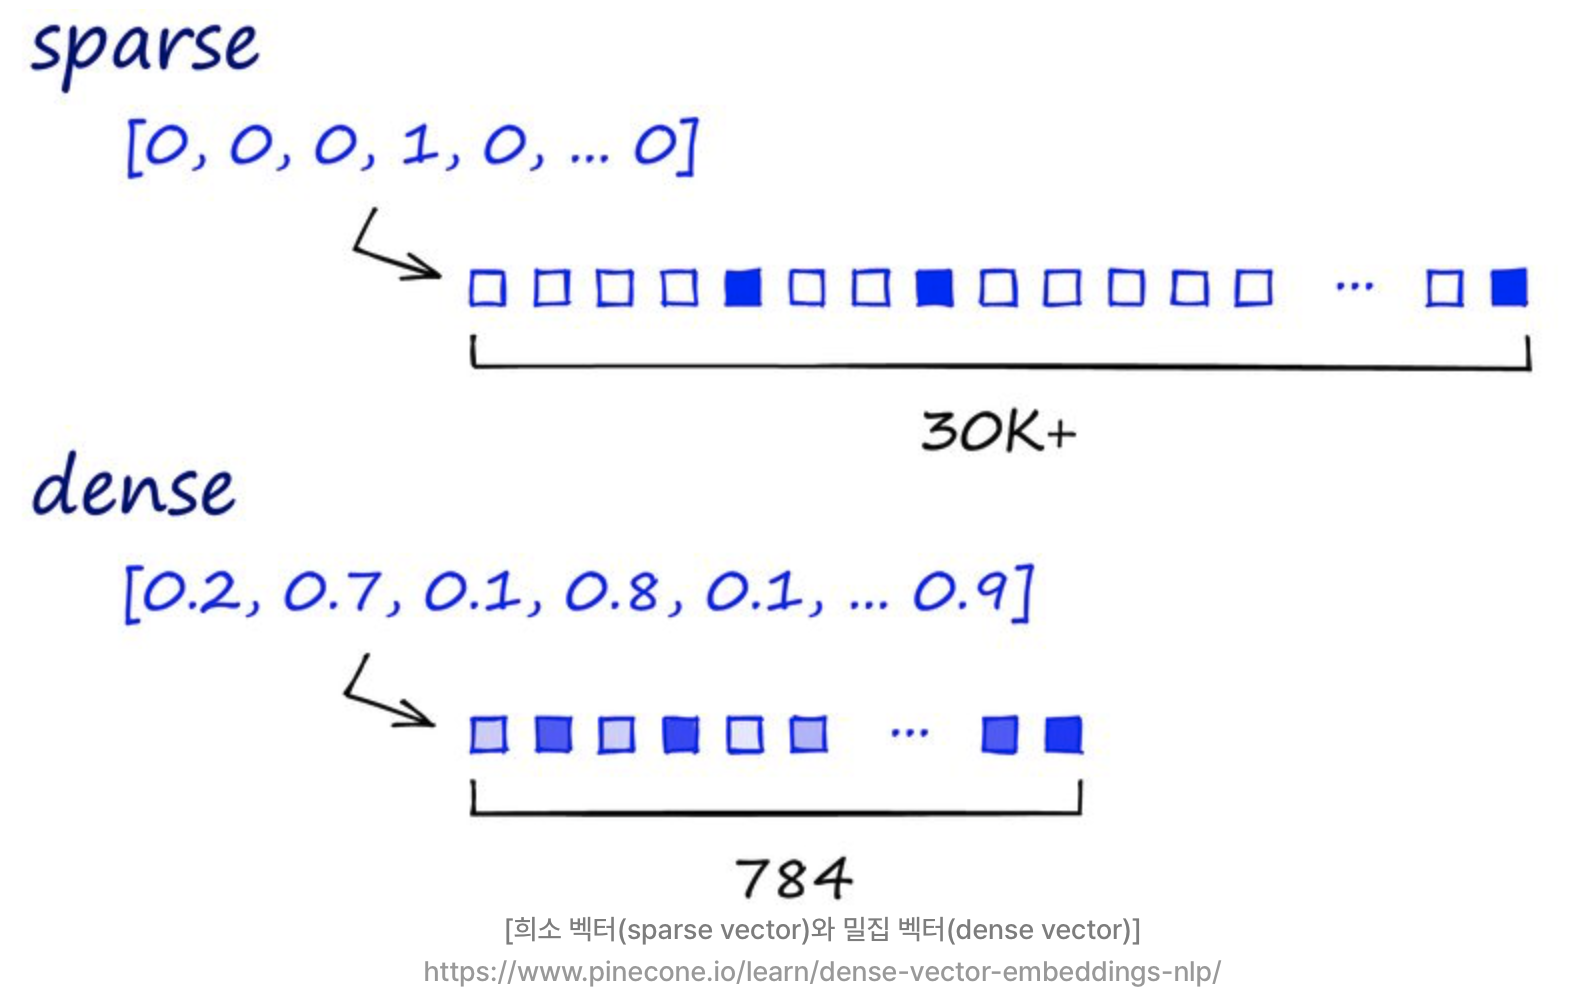

또 워드 임베딩에서는 단어가 갖는 특성을 계산할 수 있는 방법이 제안됩니다. 단어 사이의 관계나 문장에서 단어가 갖는 특징을 수식으로 나타내고 계산해서 정확한 숫자로 나타내도록 하는 거죠. 이 값이 클수록(또는 작을 수록) 적합한 표현이라고 객관적으로 판단할 수 있게 말이에요. 여기서 사용되는 방법이나 수식은 꽤 다양합니다. 저마다 더 훌륭한 방법을 생각해 내는 것이죠.

앞서 말한 내적을 활용하는 방법을 예로 들어도 좋습니다. 비슷한 의미를 가진 두 단어의 내적이 클수록 잘 변환된 벡터라고 판단하는 거죠. 그러면 비슷한 단어의 내적은 커지고 반대되는 단어의 내적은 작아지도록 만드는 식을 통해 벡터를 계산해 낼 수 있습니다. 이렇게 알아보기 쉬운 단순한 방법을 쓰면 좋겠지만 안타깝게도 실제로 벡터 변환에 이용되는 방법들은 주로 통계학에 기반을 둔 복잡한 식을 활용합니다.

또, 시간이 흘러 이제는 인공 신경망을 이용한 방법이 많이 사용되는데요. 인공 신경망을 학습해가는 과정을 이용해 벡터의 값을 조정해 가는 방법입니다. 우선 무작정 단어의 적합성이나 유사도를 계산해 보고 그 값이 커져야 하는지 작아져야 하는지 따져봅니다. 그런 후 단어 벡터의 값을 조금씩 바꿔 갑니다. 마치 딥러닝에서 손실 값을 이용해 가중치를 바꿔 가듯이 단어 벡터의 값을 조금씩 바꿔 가는 거죠. 이렇게 반복해 학습이 끝나면 단어가 들어가야 할 위치나 의미에 맞게 단어 벡터의 값이 결정됩니다.

에를 들면 아래처럼 단어 벡터가 결정이 될 수 있겠죠.

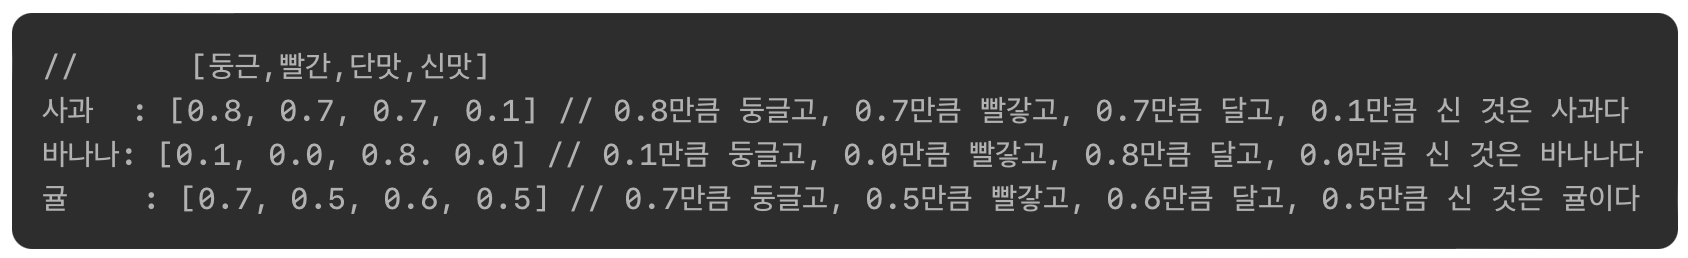


이건 예시일 뿐이니 이렇다고 생각하면 절대 안됩니다. 임베딩 방법마다 벡터 값이 결정되는 방법도 다르고 벡터를 구성하는 각 숫자 값의 의미도 파악하기란 불가능합니다.

결론적으로 워드 임베딩에서 중요한 것은 두 가지 입니다.

- 한 단어를 길이가 비교적 짧은 밀집 벡터로 나타낸다.
- 그런데 이 밀집 벡터는 단어가 갖는 의미나 단어 간의 관계 등을 어떤 식으로든 내포하고 있다.

이렇게 만들어진 밀집 벡터를 임베딩 벡터라고 말하는데요. 지금까지 이야기를 보면 임베딩 벡터라는 결과물에 대해서만 이야기했습니다. 이제 어떻게 임베딩 벡터를 만들지 살펴볼 차례인데요. 워드 임베딩 방법에는 여러가지가 있기 때문에 지금까지 설명하지 않았던 것 뿐이에요.

앞으로 워드 임베딩을 수행하는 여러 알고리즘을 살펴보게 될 것입니다.


- A Neural Probabilistic Language Model(https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

워드 임베딩은 2003년 요슈아 벤지오(Yoshua Bengio) 교수가 NPLM(Neural Probabilistic Language Model) 이란 모델을 통해 제안했습니다. 하지만 당시 이 모델은 학습 속도가 지나치게 느리다는 단점이 있었고, 2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상시킨 Word2Vec 을 제안했죠. Word2Vec 이후로 FastText 나 GloVe 등과 같은 임베딩 방법이 추가로 제안되었답니다. 여기서는 방금 언급한 이 세 가지 방법에 대해서 배워보겠습니다. 우선 Word2Vec에 대해서 알아볼까요?

## 7-5. Word2Vec (1) 분포 가설

Word2Vec을 이해하기에 앞서 Word2Vec이 어떤 일을 할 수 있는지 보겠습니다.

- Korean Word2Vec (https://word2vec.kr/search/)

위 사이트는 한국어 데이터로 Word2Vec을 학습하여, 학습된 Word2Vec 벡터들로 연산한 결과를 제공하는 사이트입니다. 위 사이트에 가서 '한국 - 서울 + 도쿄'라는 수식을 입력하면, '일본/Noun'이라는 결과가 나옵니다. 여러분들도 생각나는 다른 수식들을 가지고 10번 정도 직접 시도해 보세요!

놀랍게도 마치 단어들을 가지고 어떤 의미적인 연산을 하는 것처럼 보입니다. 어떻게 이런 일이 가능할까요? 설명에 앞서 Word2Vec의 메커니즘을 정리한 영상을 시청해 봅시다!

영상을 통해 Word2Vec에 대한 감을 잡으셨으리라 생각합니다. 이제 Word2Vec에 대해 더 자세히 알아보도록 합시다.

### 분포 가설(Distributional Hypothesis)
---
Word2Vec은 앞서 말했듯이 단어를 벡터로 표현하는 방법의 일종으로 저차원으로 이루어져 있고, 단어의 의미를 여러 차원에 분산하여 표현한 벡터입니다.

Word2Vec의 핵심 아이디어는 분포 가설(distributional hypothesis) 을 따릅니다. 이 가설은 언어학자 존 루퍼트 퍼스(John Rupert Firth)의 다음 인용으로 설명됩니다.

> You shall know a word by the company it keeps (곁에 오는 단어들을 보면 그 단어를 알 수 있다).

이 인용은 어떤 단어들의 의미를 보려면 주변 단어들을 보라는 의미를 내포하고 있습니다. 그렇다면 분포 가설은 어떤 가설인가요?

> 분포 가설 : ‘비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.’

분포 가설에 따르는 Word2Vec은 같이 등장하는 경향이 적은 단어들에 비해 '강아지', '애교, '귀여운'과 같은 단어들을 상대적으로 유사도가 높은 벡터로 만듭니다.

## 7-6. Word2Vec (2) CBoW

Word2Vec에는 크게 CBoW와 Skip-gram라는 두 가지 방법이 있습니다. CBoW는 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다. 메커니즘 자체는 거의 동일하기 때문에 CBoW를 이해한다면 Skip-Gram도 손쉽게 이해 가능합니다. 우선 CBoW에 대해서 알아볼까요?

### CBoW(Continuous Bag of words)
---
- 예문 : "I like natural language processing."

갖고 있는 코퍼스에 위와 같은 문장이 있다고 합시다. CBoW는 중간에 있는 단어를 예측하는 방법이므로
 {"i", "like", "language", "processing"}으로부터 "natural"을 예측하는 것은 CBoW가 하는 일입니다. 이때 예측해야 하는 단어 "natural"을 중심 단어(center word) 라고 하고, 예측에 사용되는 단어들을 주변 단어(context word) 라고 합니다.

중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지를 결정를 결정했다면, 그 범위를 윈도우(window) 라고 합니다. 만약 윈도우 크기가 1이고, 예측하고자 하는 중심 단어가 "language"라면 앞의 한 단어인 "natural"과 뒤의 한 단어인 "processing"을 참고합니다. 윈도우 크기가 m일 때, 중심 단어를 예측하기 위해 참고하는 주변 단어의 개수는 2m입니다.

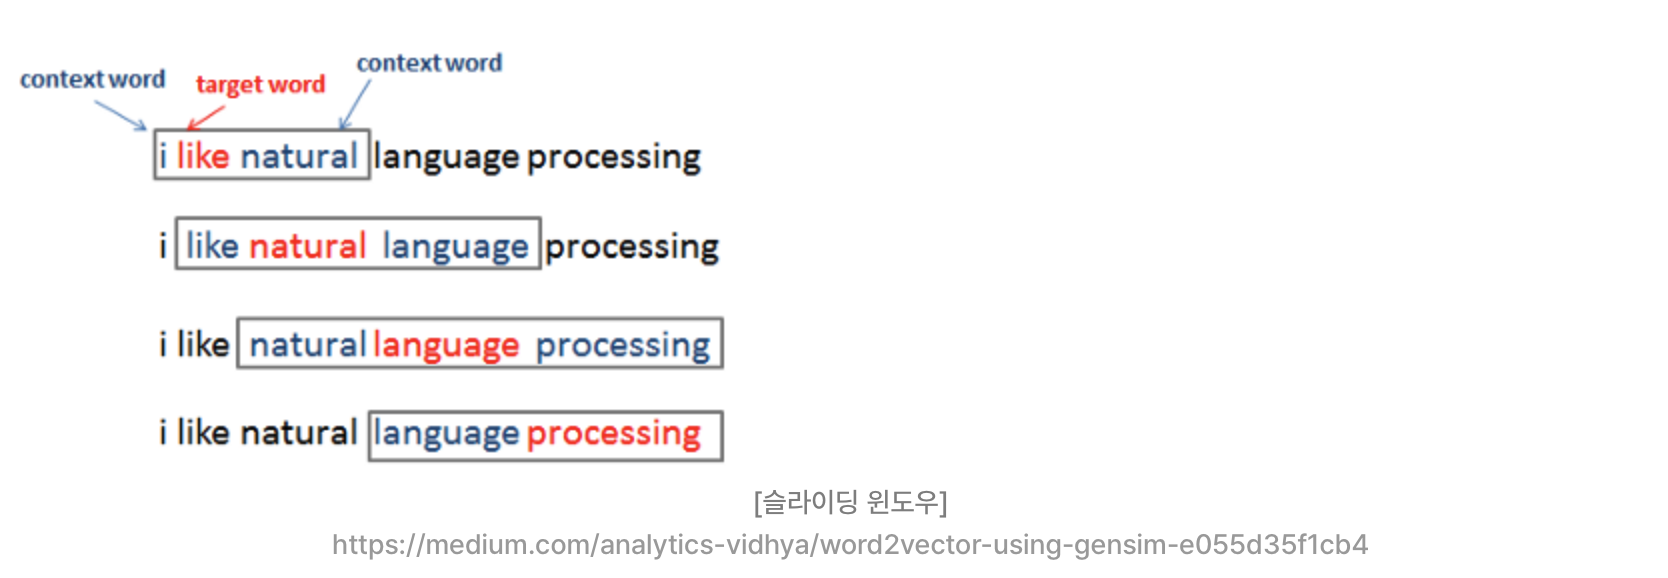

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window) 라고 합니다. 위의 그림은 윈도우 크기가 1일 때, 하나의 샘플 문장에 대해 데이터셋을 만드는 과정을 보여줍니다. 위 그림에서 슬라이딩 윈도우를 처음부터 끝까지 마친다면 다음과 같은 데이터셋을 얻을 수 있습니다.

- 아래 데이터셋의 형식은 ((주변 단어의 셋), 중심 단어)임을 가정한다.
- ((like), I), ((I, natural), like), ((like, language), natural), ((natural, processing), language), ((language), processing)

이렇게 선택된 데이터셋에서 단어 각각은 원-핫 인코딩되어 원-핫 벡터가 되고, 원-핫 벡터가 CBoW나 Skip-gram의 입력이 됩니다. 자, 이제 CBoW를 시각화한 그림을 볼게요.






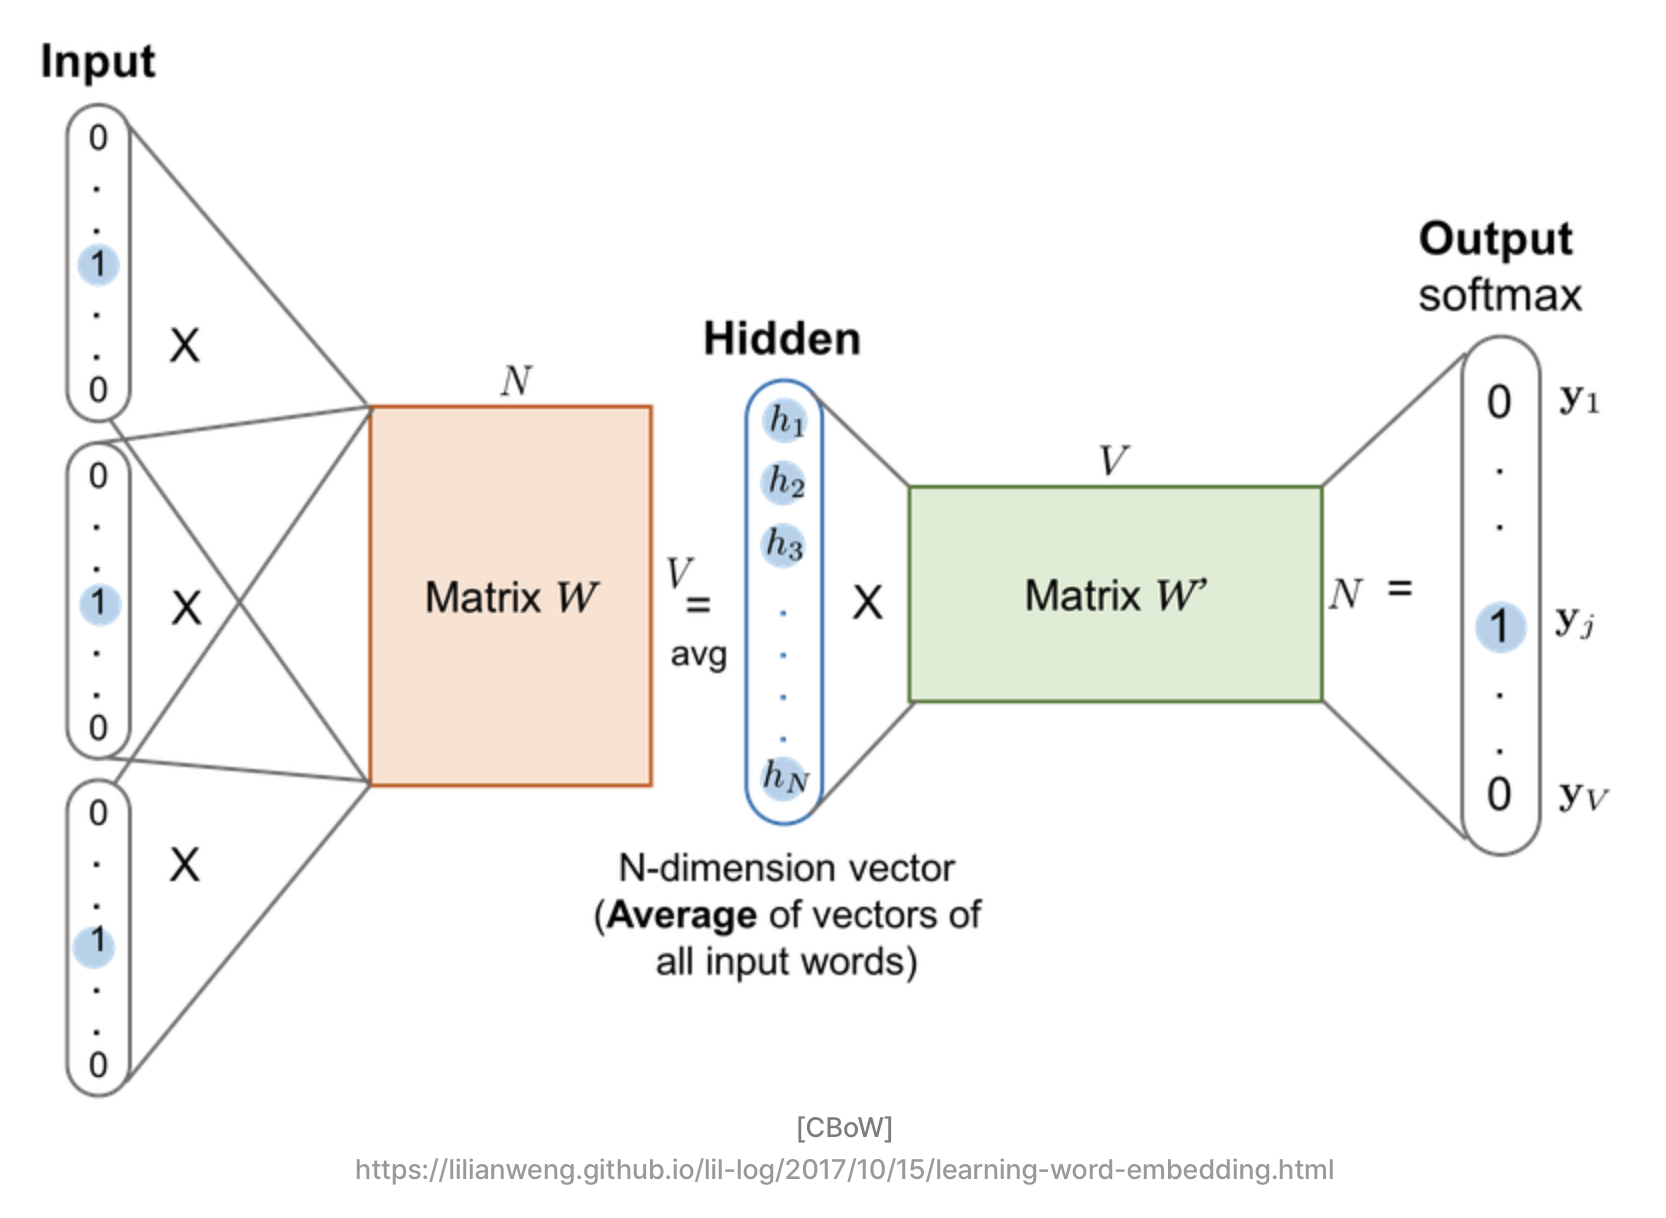

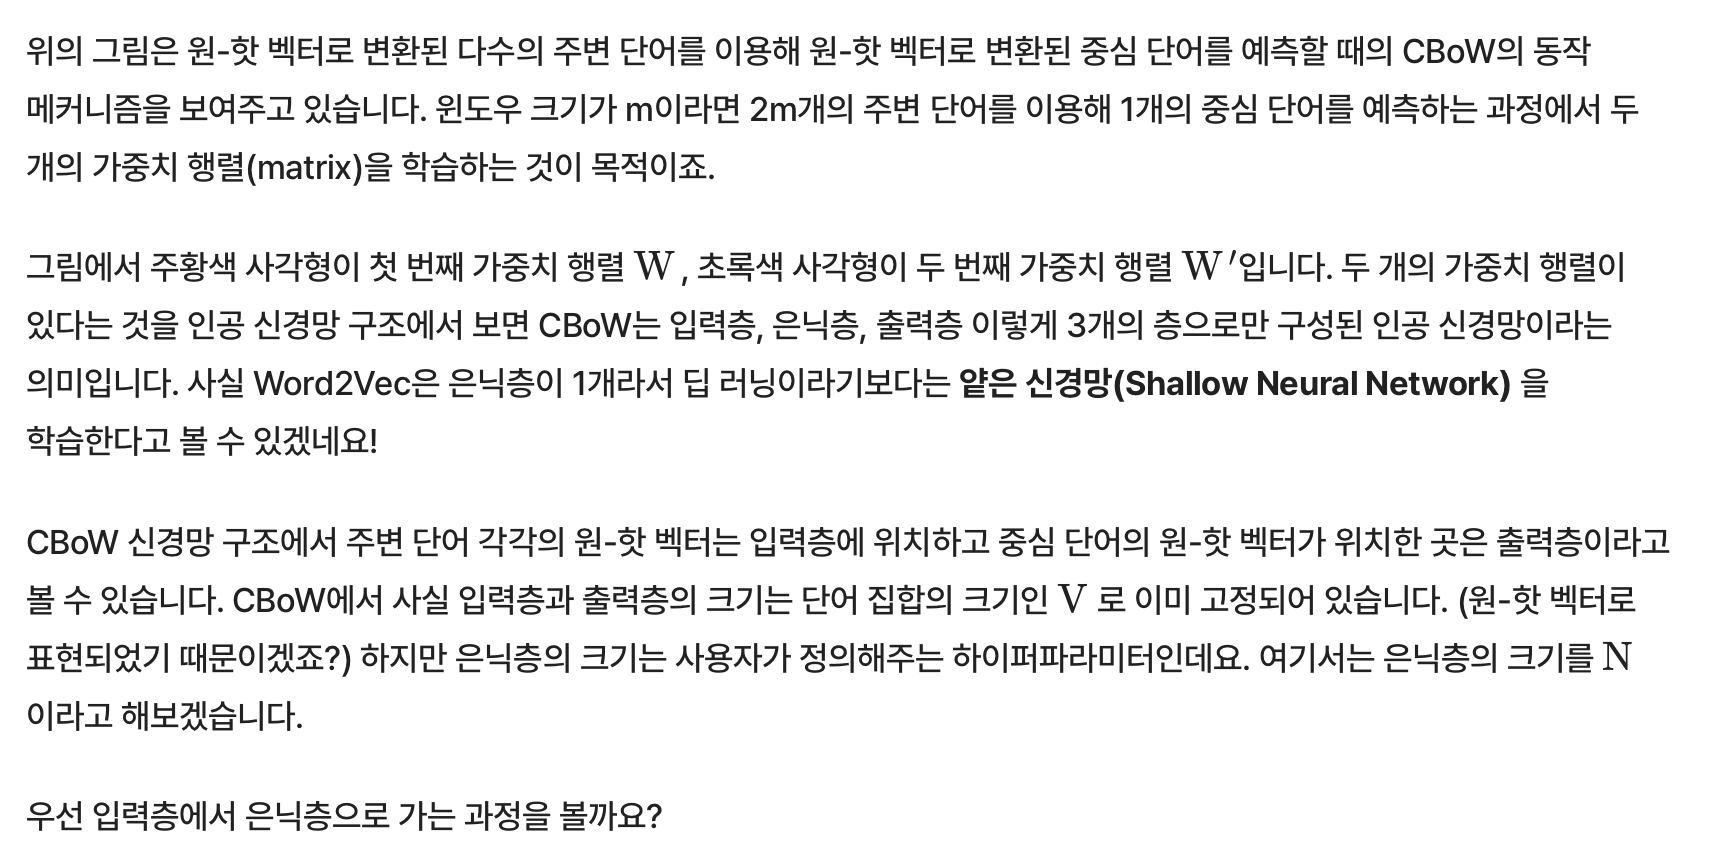

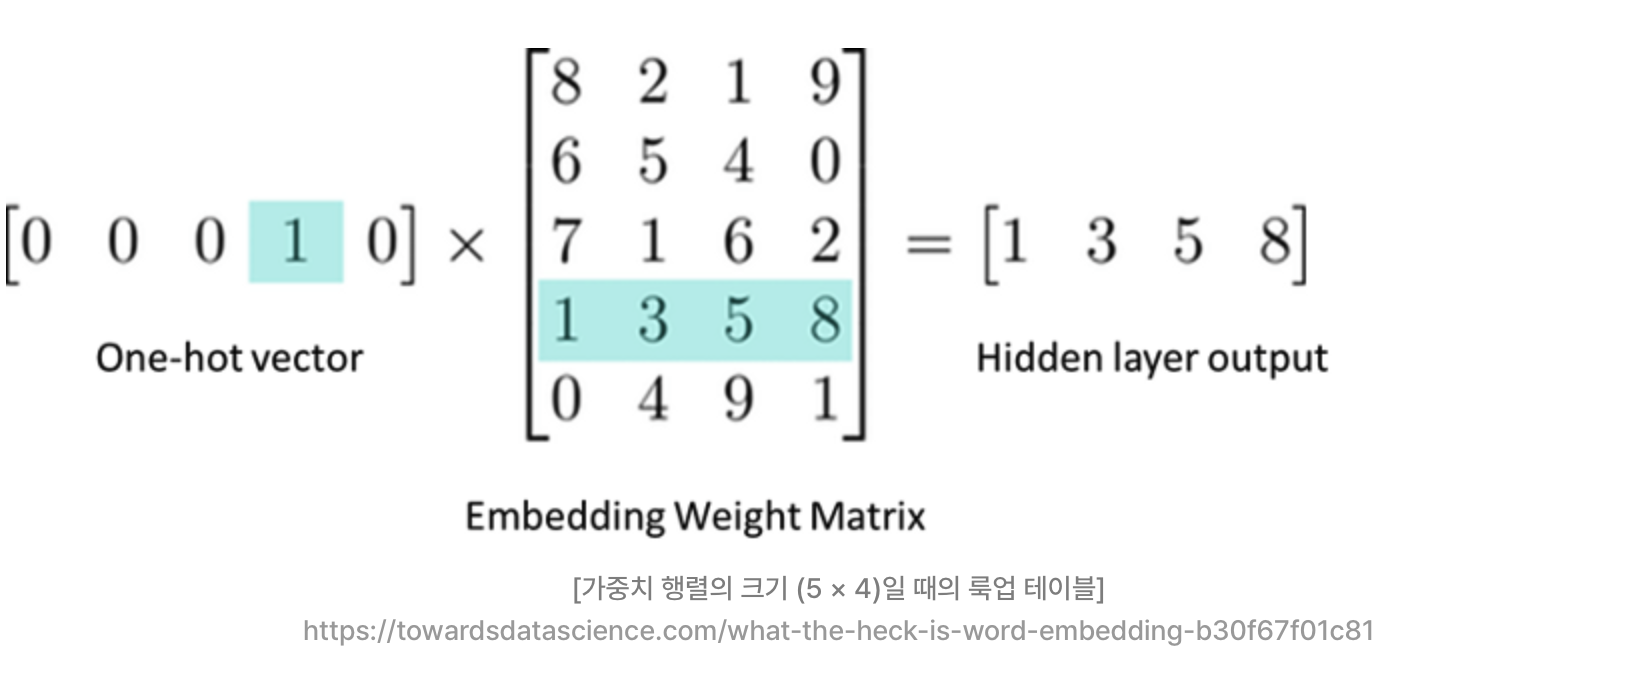

주변 단어로 선택된 각각의 원-핫 벡터는 첫 번째 가중치 행렬과 곱해지게 됩니다. 이때 가중치 행렬의 크기는 (V × N)입니다. 그런데 원-핫 벡터는 각 단어의 정수 인덱스 i에 해당되는 위치에만 1의 값을 가지므로, 원-핫 벡터와 가중치 행렬과의 곱은 가중치 행렬의 i 위치에 있는 행을 그대로 가져오는 것과 동일 합니다.

이를 마치 테이블에서 값을 그대로 룩업(lookup)해오는 것과 같다고 하여 룩업 테이블(lookup table) 이라고 합니다. 위의 그림은 가중치 행렬의 크기가 (5 × 4)일 때의 룩업 테이블을 보여줍니다. 위의 그림에서는 단어장의 크기가 5, 은닉층의 크기가 4일 때를 가정하고 있습니다.

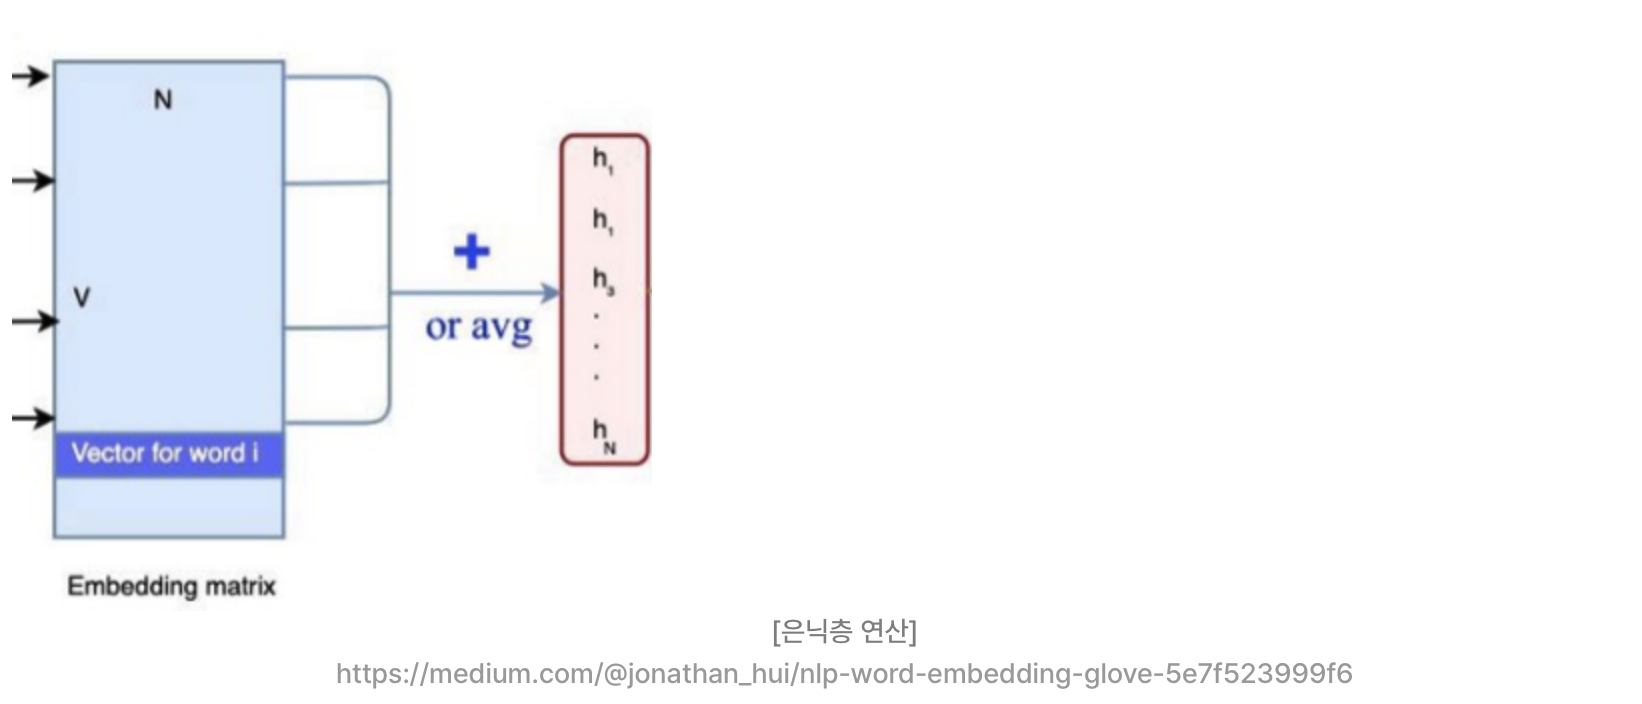

룩업 테이블을 거쳐서 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기를 가집니다. CBoW에서는 이 벡터들을 모두 합하거나, 평균을 구한 값 을 최종 은닉층의 결과로 합니다. 그러면 최종 은닉층의 결과도 N차원의 벡터가 되겠죠. 이게 은닉층 연산의 전부입니다. Word2Vec에서는 은닉층에서 활성화 함수나 편향(bias)을 더하는 연산을 하지 않습니다.

Word2Vec에서의 은닉층은 활성화 함수가 존재하지 않고, 단순히 가중치 행렬과의 곱셈만을 수행하기에 기존 신경망의 은닉층과 구분 지어 투사층(projection layer) 이라고도 합니다.

이제 은닉층에서 출력층으로 가는 과정과 출력층의 연산을 보겠습니다.

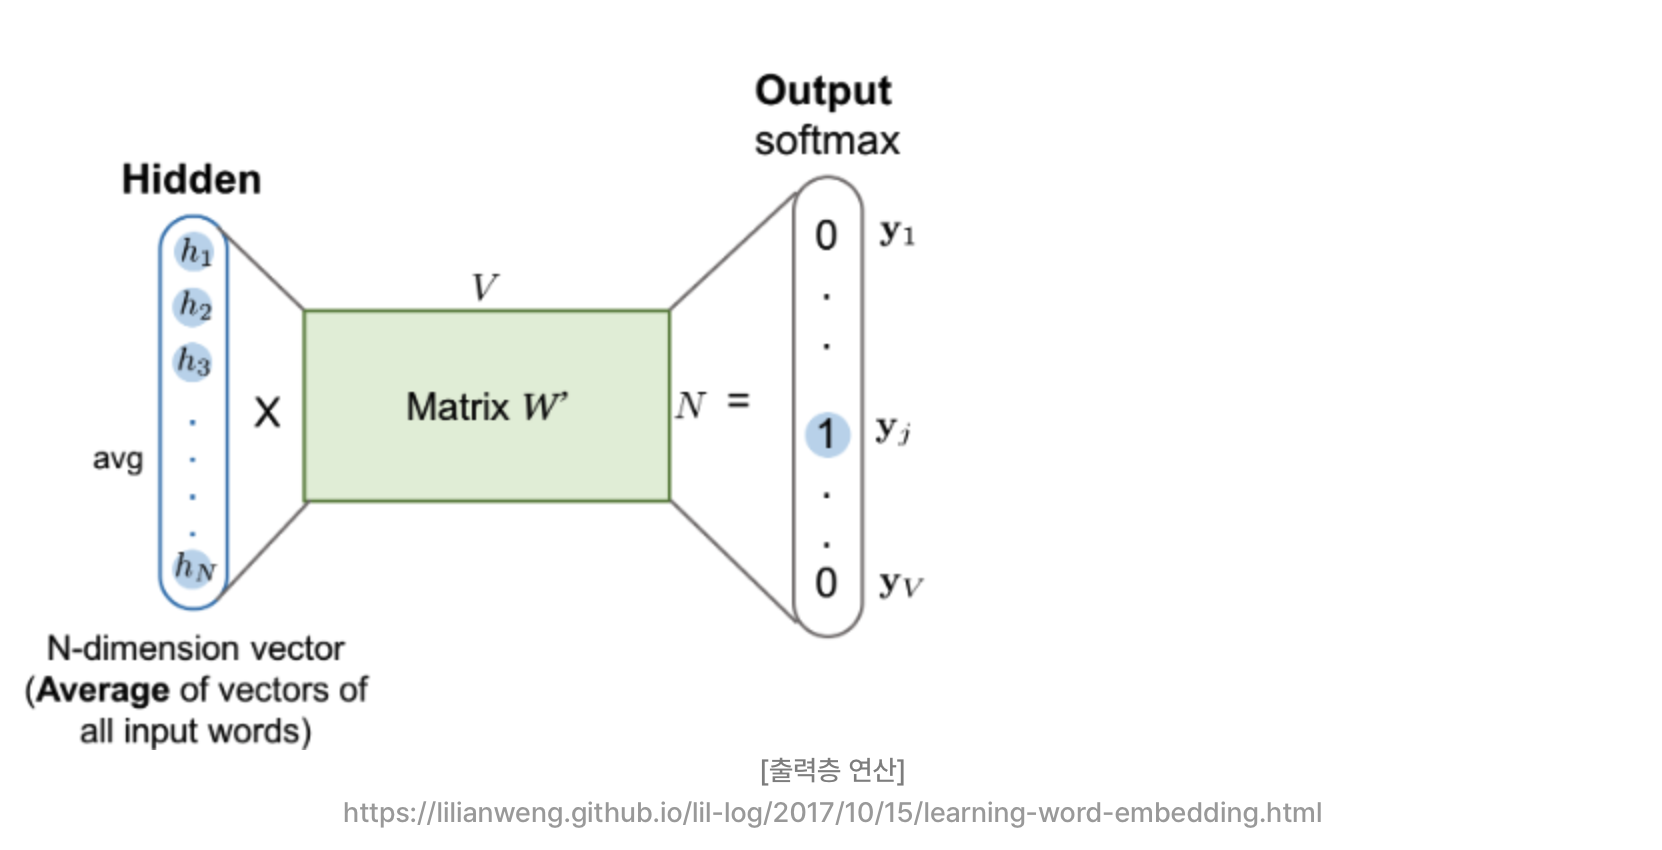

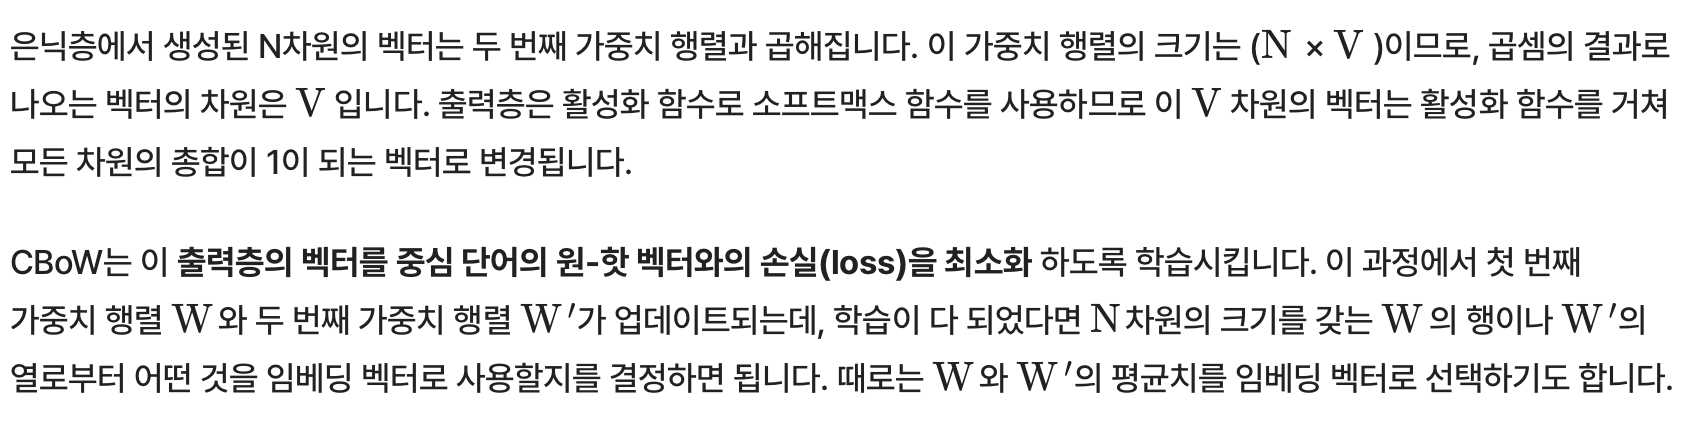

## 7-7. Word2Vec (3) Skip-gram과 Negative Sampling

### Skip-gram
---
CBoW를 이해했다면 Skip-gram 을 이해하는 것은 정말 쉽습니다. 이제 주변 단어로 중심 단어를 예측하는 것이 아니라, 중심 단어로부터 주변 단어를 예측한다는 것이 다른 점이죠.

앞서 살펴봤던 그림을 다시 보겠습니다. CBoW의 경우 위 그림에서 슬라이딩 윈도우 방식으로 얻을 수 있는 샘플 수는 5개였습니다. 그런데 Skip-gram은 데이터셋 구성부터 다릅니다. 중심 단어로부터 주변 단어 각각을 예측하기 때문입니다. 위 그림으로부터 얻을 수 있는 Skip-gram의 데이터셋은 아래와 같습니다.

아래 데이터셋의 형식은 (중심 단어, 주변 단어)임을 가정합니다.
(i, like) (like, I), (like, natural), (natural, like), (natural, language), (language, natural), (language, processing), (processing, language)
Skip-gram을 시각화한 그림은 다음과 같습니다.



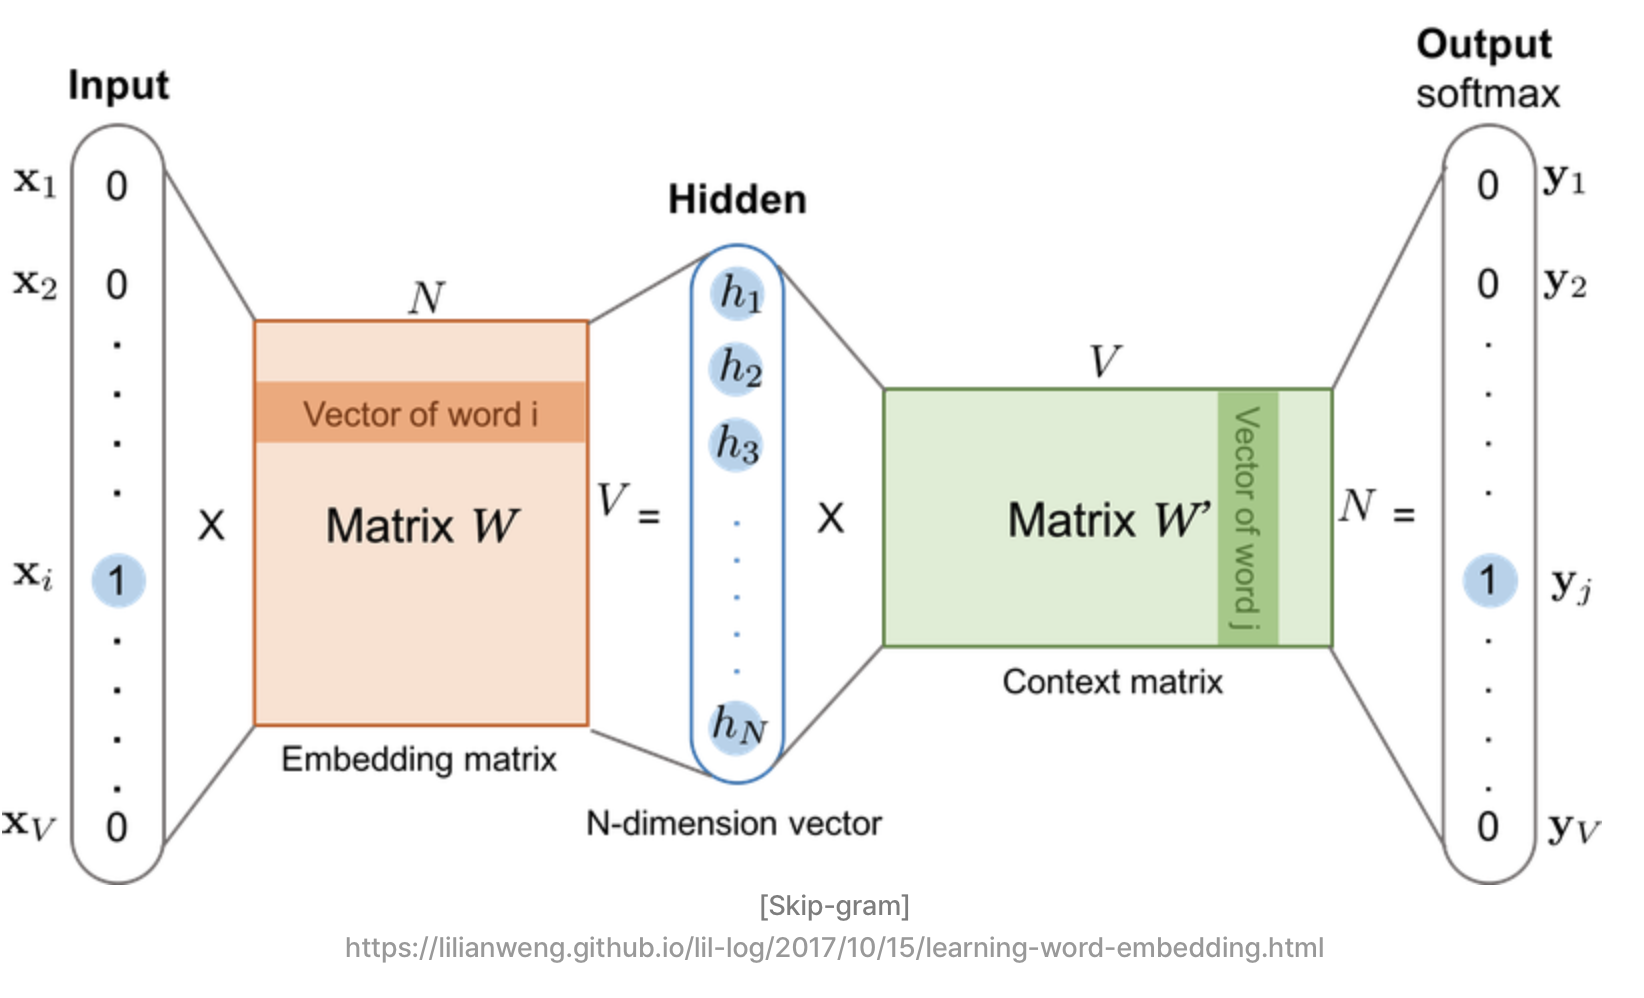

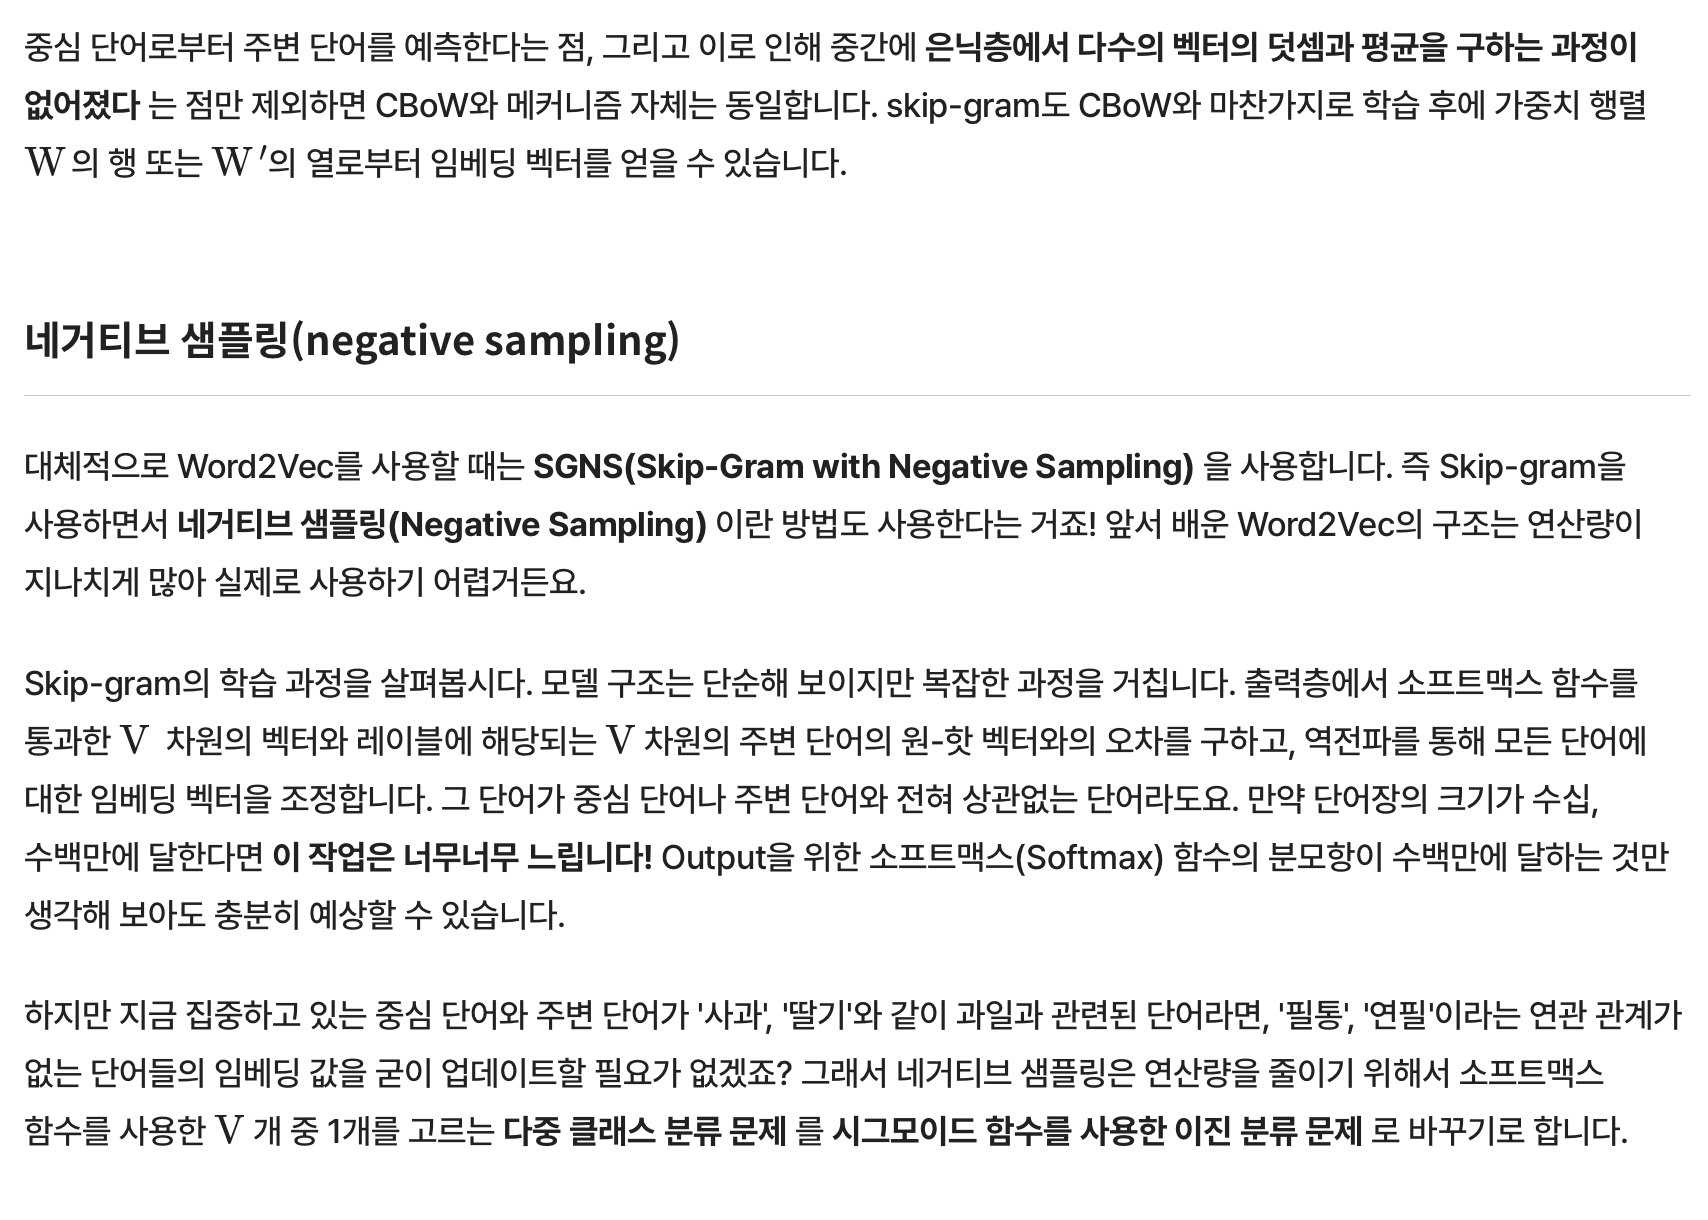

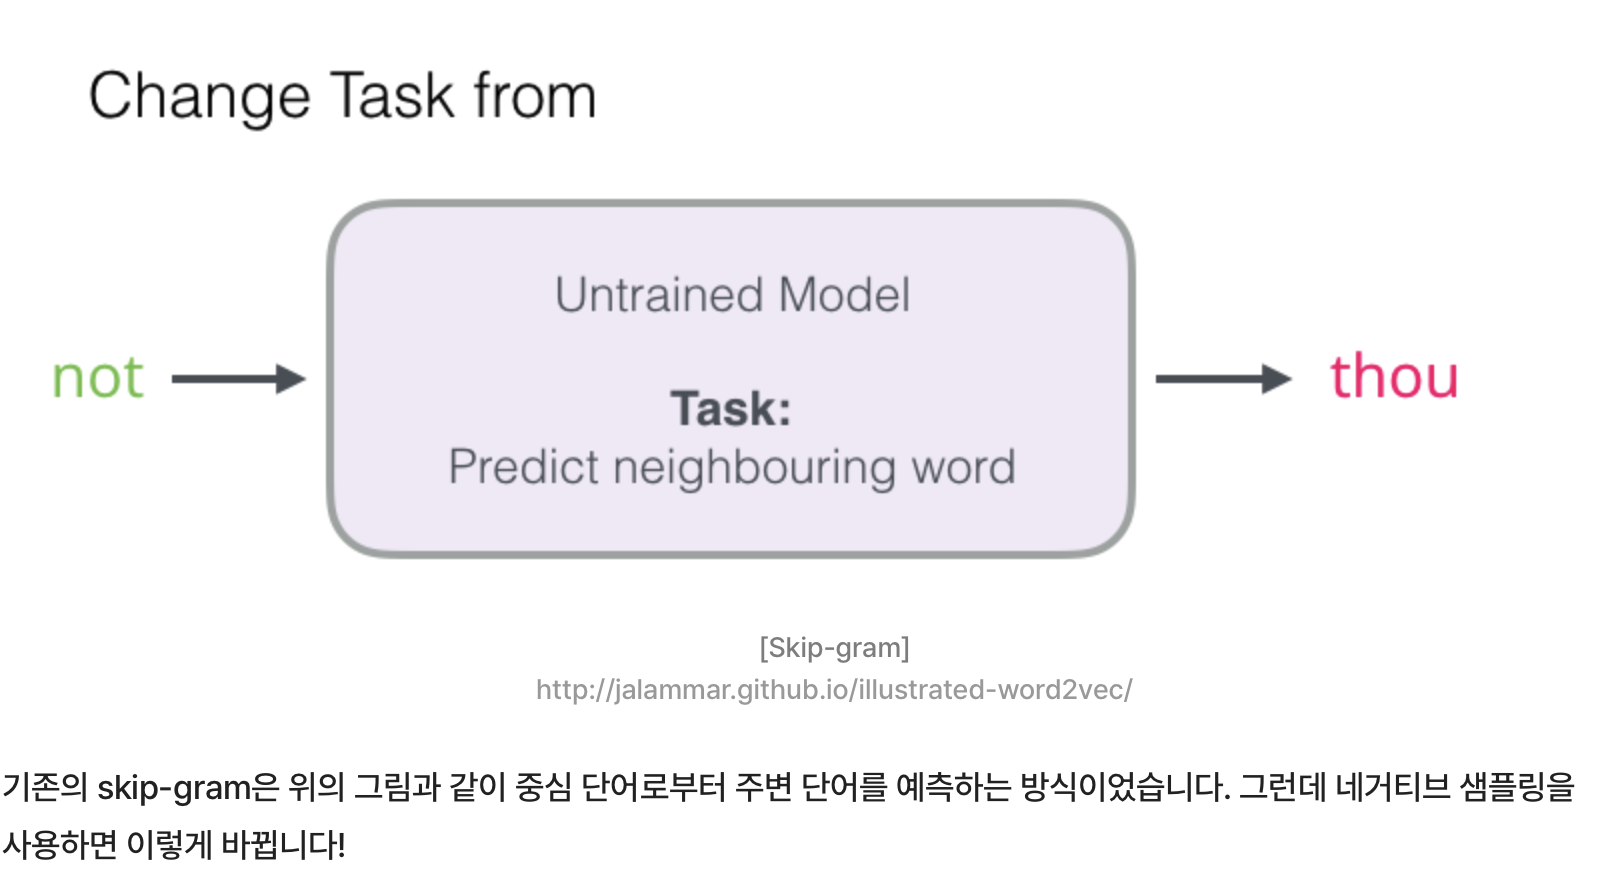

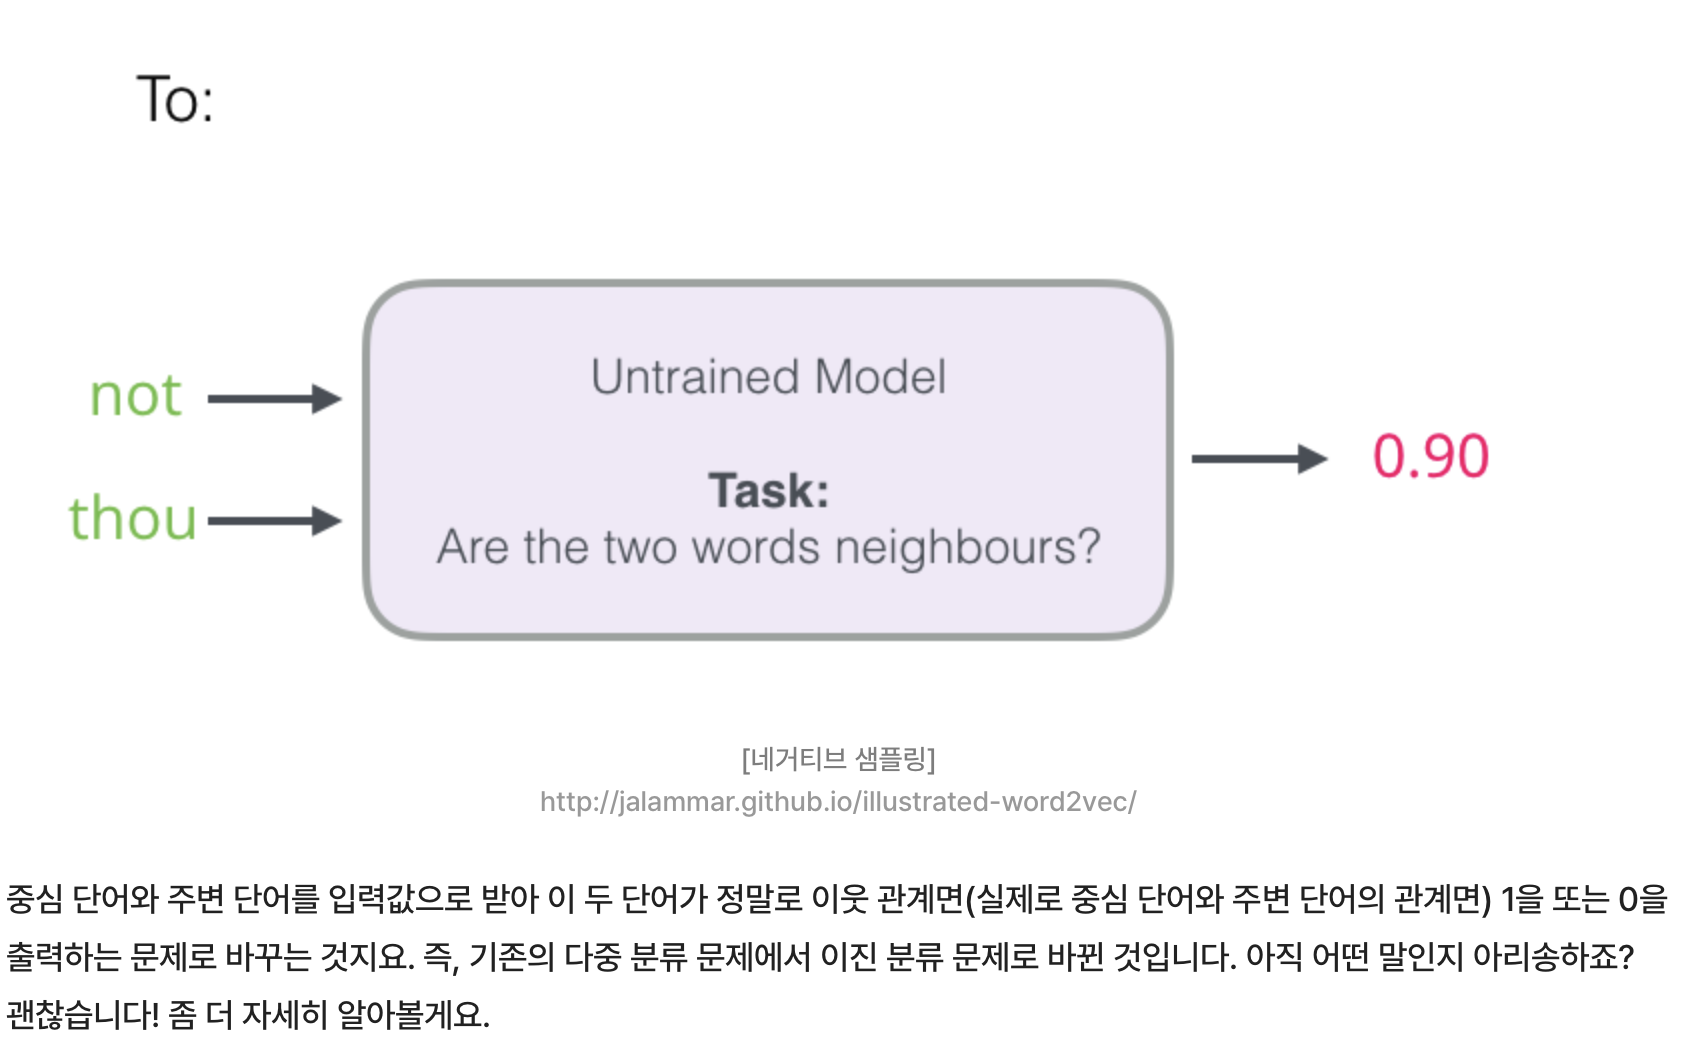

기존에 skip-gram이 데이터셋을 만드는 방식을 복습해 볼게요. 아래의 예문을 볼까요?

예문 : Thou shalt not make a machine in the likeness of a human mind
윈도우 크기가 2일 때, 위 예문으로부터 슬라이딩 윈도우를 통해서 만들어지는 skip-gram의 데이터셋은 아래의 그림과 같습니다. Skip-gram 방식이기에 input word는 중심 단어, target word는 주변 단어를 의미합니다.

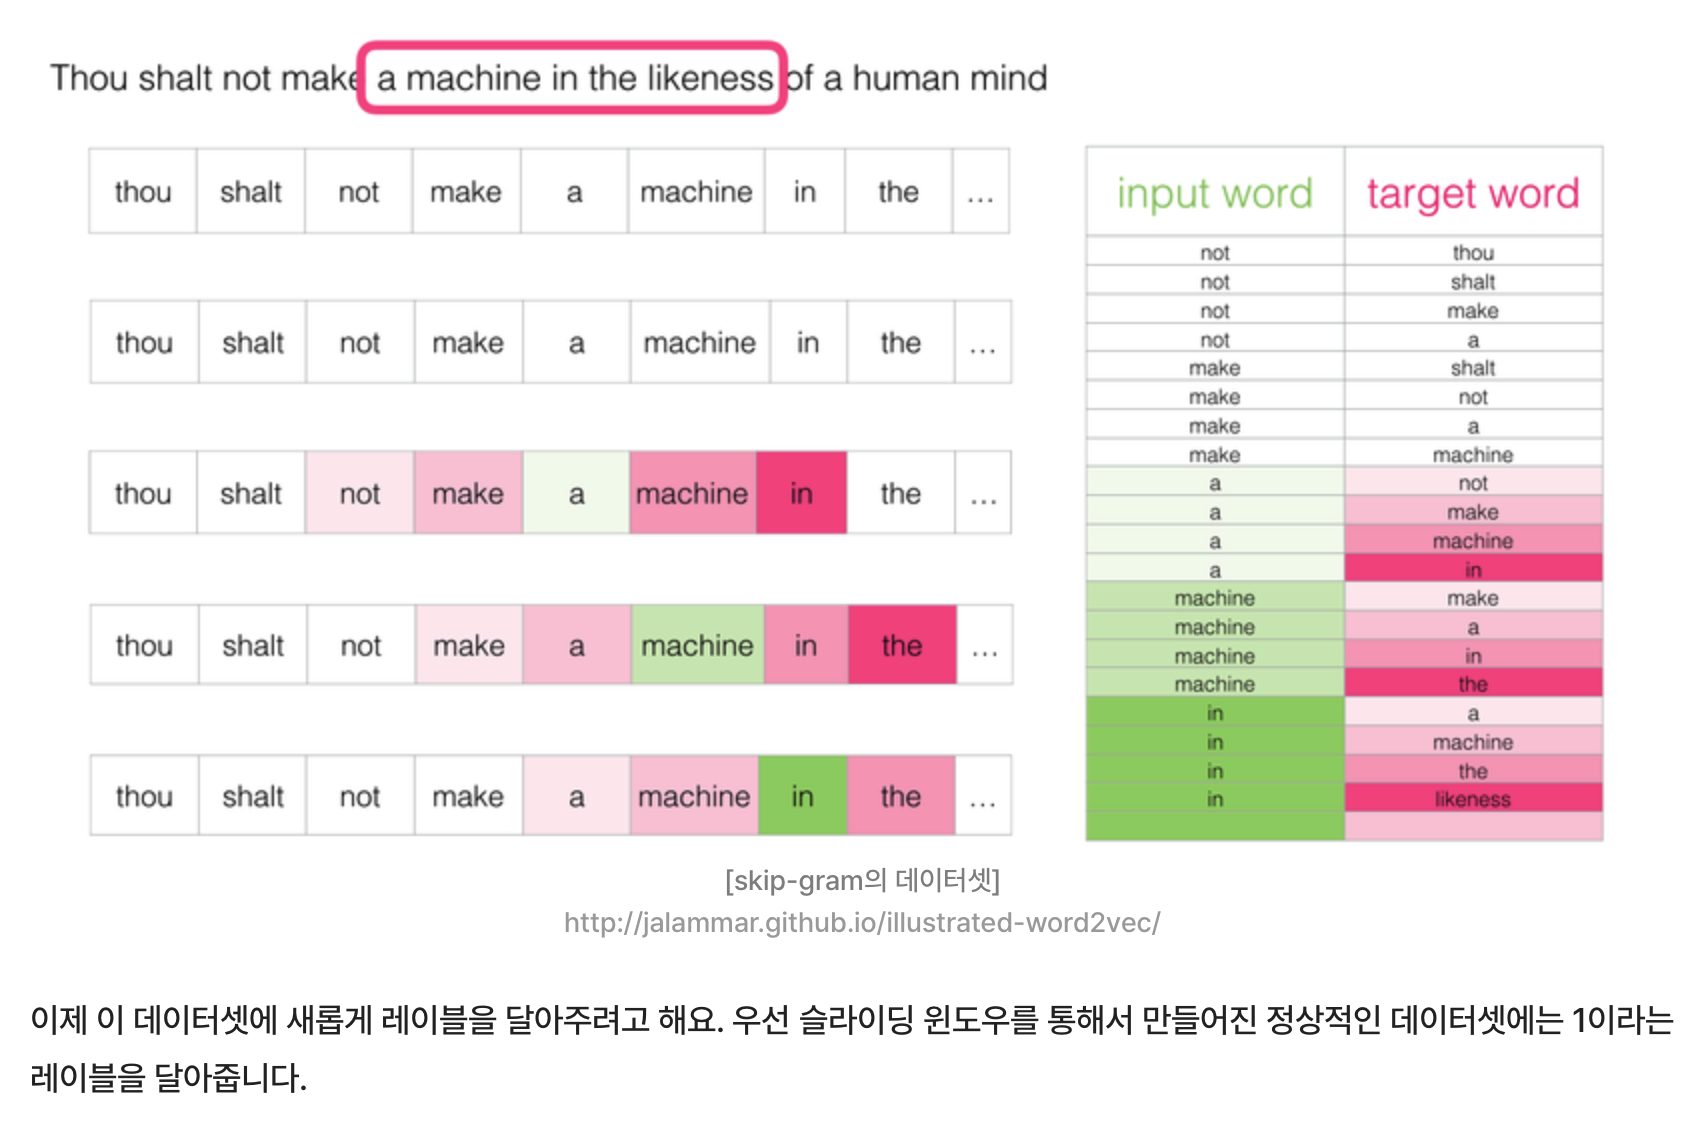

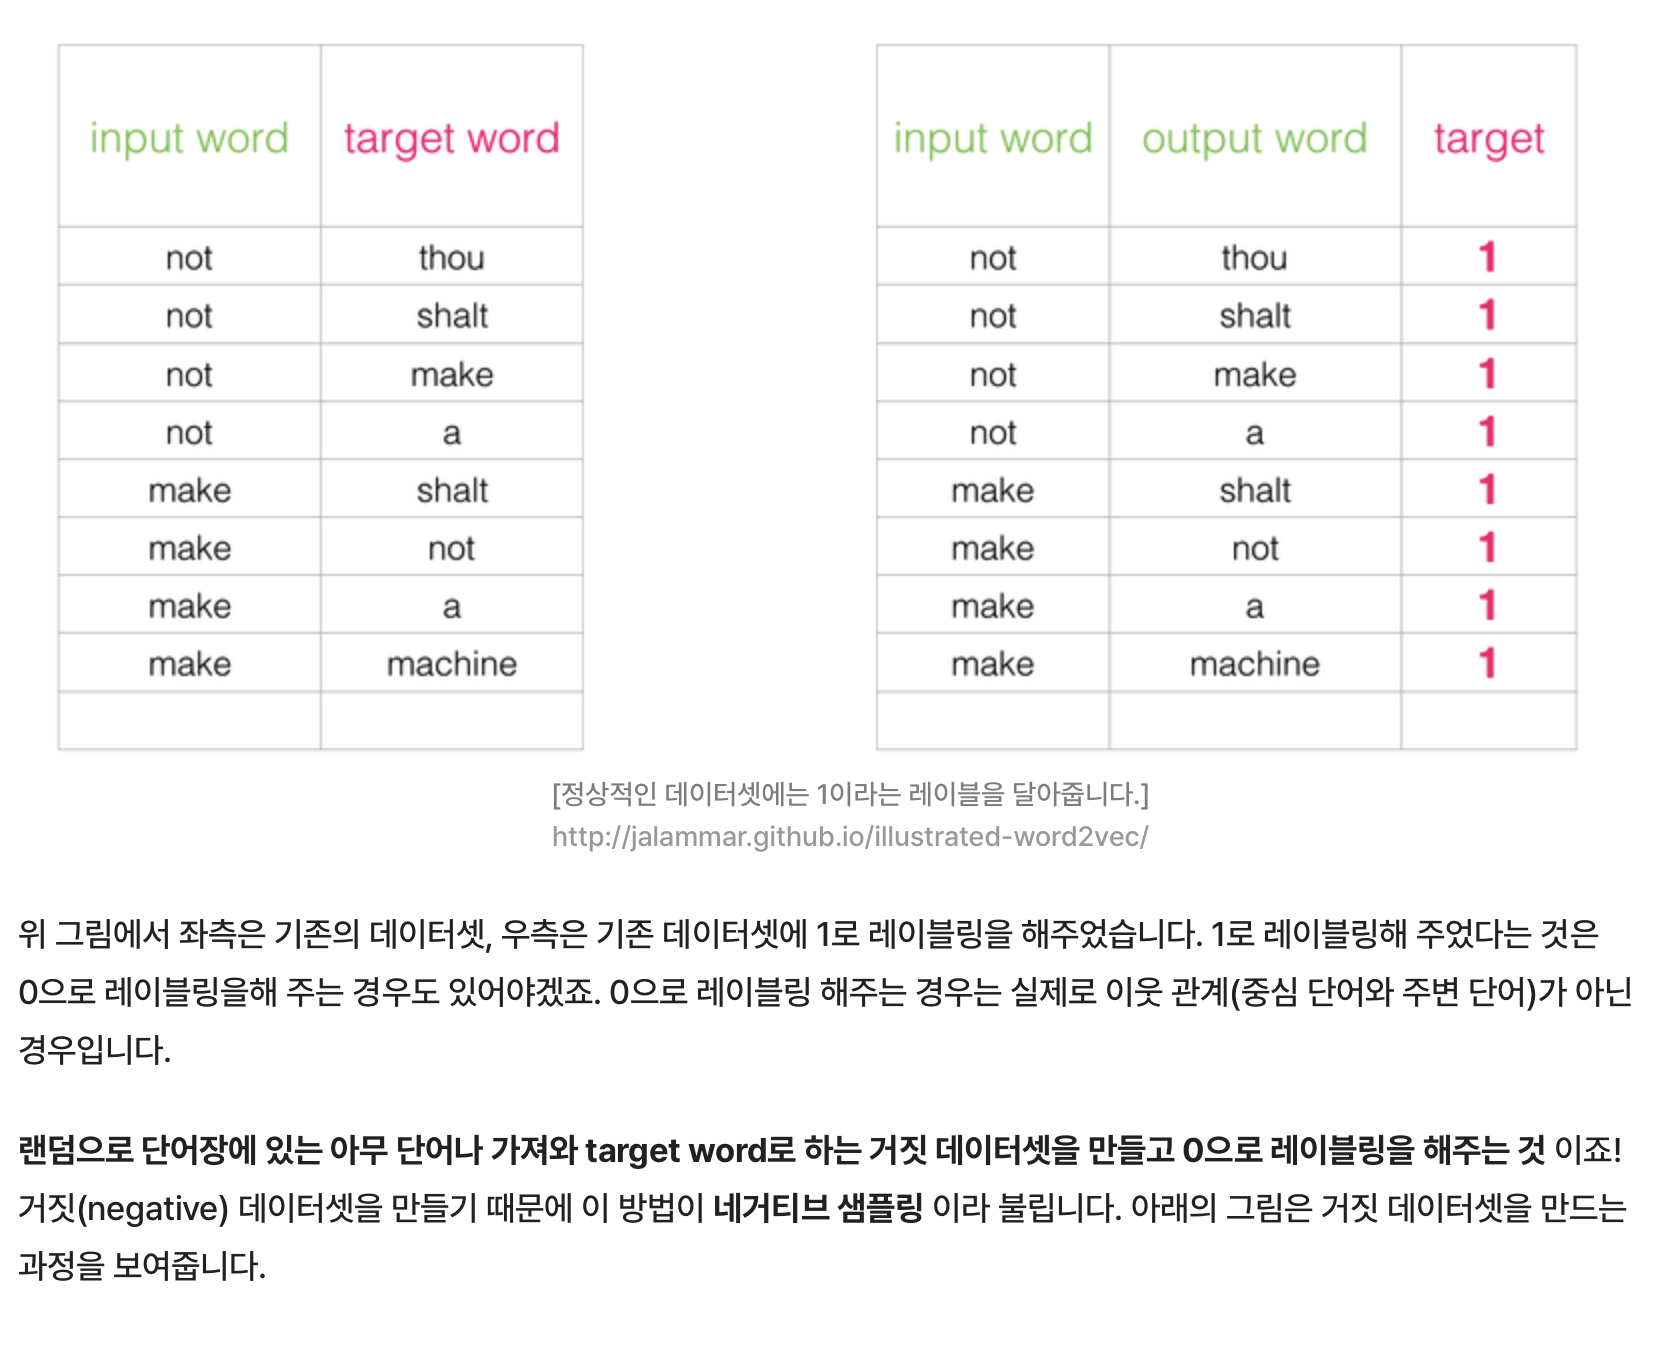

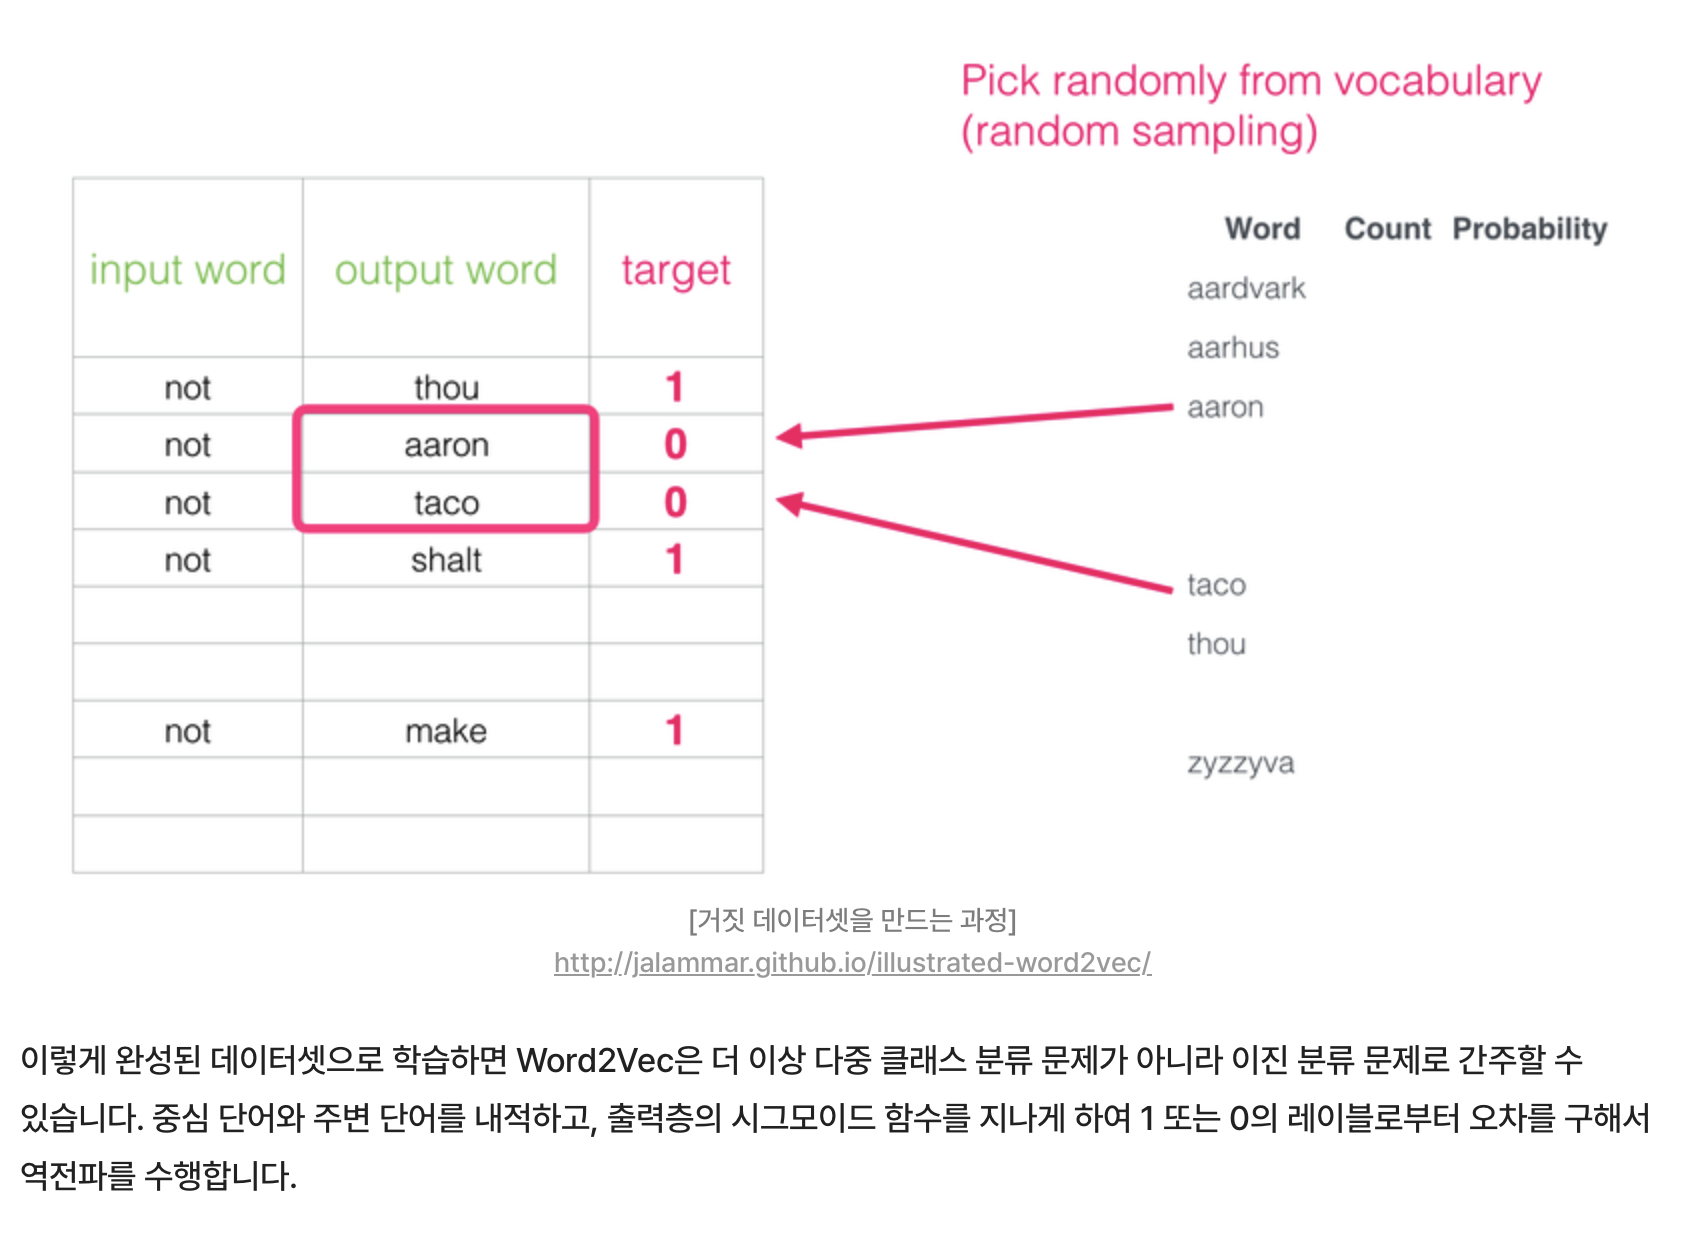

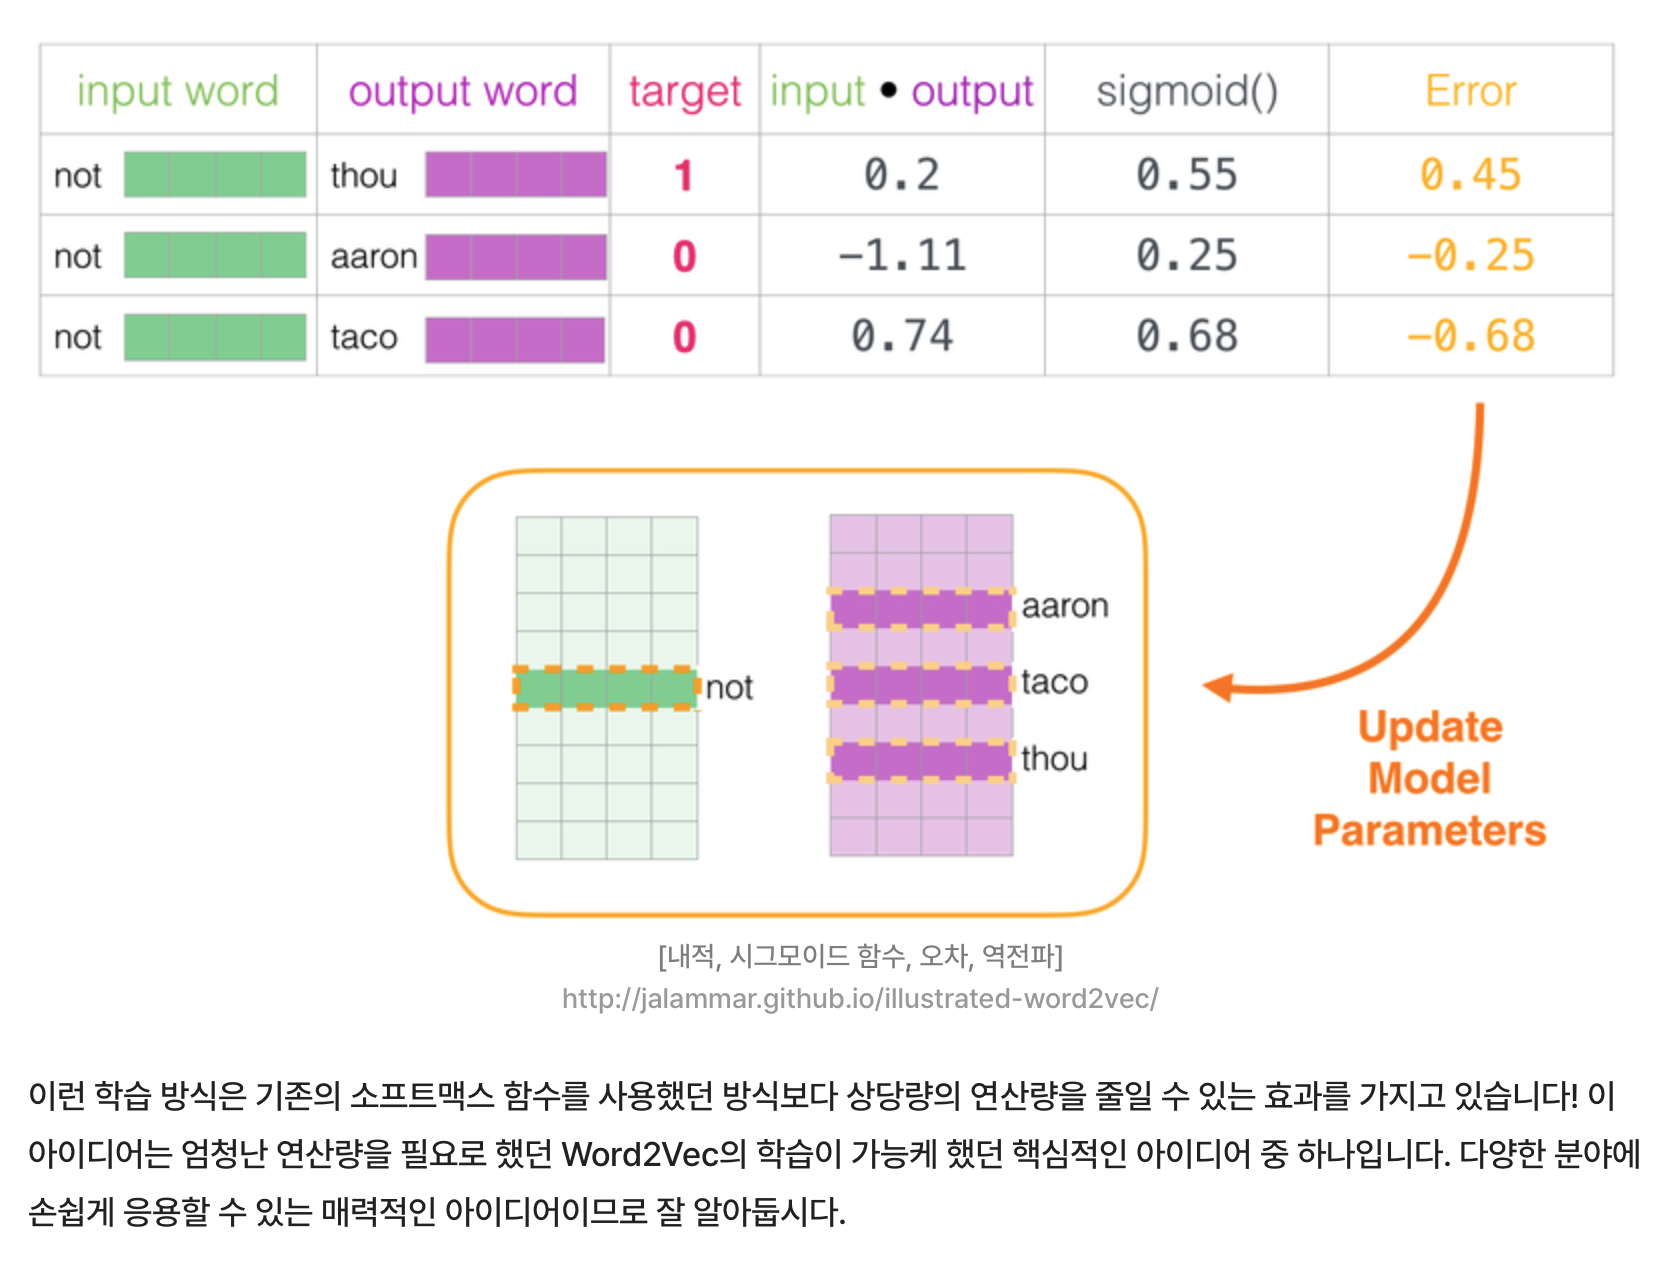

## 7-8. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제

### 영어 Word2Vec 실습
---
영어 데이터를 다운로드받아 직접 Word2Vec을 훈련시켜보겠습니다. Word2Vec을 별도로 구현할 필요없이 파이썬의 gensim 패키지를 통해 이미 구현된 Word2Vec 모델을 사용할 수 있습니다. 여기서 사용할 훈련 데이터는 NLTK에서 제공하는 코퍼스이며, gensim 패키지는 토픽 모델링을 위한 NLP 패키지입니다.
Cloud 사용자는 이미 설치되어 있으니 아래의 명령어를 참고로만 알아두세요.

$ pip install nltk
$ pip install gensim

NLTK에 내장된 코퍼스를 다운로드합니다. NLTK 코퍼스는 다른 프로젝트에서도 사용할 수 있으므로 프로젝트 디렉토리가 아닌, 기본 디렉토리에 설치하겠습니다.

In [20]:
!pip install nltk

In [21]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from nltk.corpus import abc
corpus = abc.sents()
print("슝~")

슝~


In [24]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [25]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [26]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


위 코드에서 각 파라미터가 의미하는 바는 아래와 같습니다.

- vector size = 학습 후 임베딩 벡터의 차원
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBoW, 1은 Skip-gram.

아주 잠깐의 기다림 끝에 Word2Vec의 학습이 완료됩니다. Word2Vec는 입력한 단어에 대해서 가장 코사인 유사도가 높은 단어들을 출력하는 model.wv.most_similar를 지원합니다. 'man'과 가장 유사한 단어들은 어떤 단어들일까요?

In [27]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233373999595642), ('skull', 0.911032497882843), ('Bang', 0.9056490063667297), ('asteroid', 0.9051957130432129), ('third', 0.9020178318023682), ('baby', 0.8993921279907227), ('dog', 0.8985978364944458), ('bought', 0.8975234031677246), ('rally', 0.8912491798400879), ('disc', 0.8888981342315674)]


일반적으로 더 많은 훈련 데이터를 사용하면 사용할수록 더 좋은 성능을 얻을 수 있답니다. 자, 이렇게 공들여 학습한 모델을 저장해두었다가 필요할 때 로드하면 더욱 좋겠죠? 이번에는 모델을 저장하고 로드하는 방법을 배워보겠습니다.

In [28]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('~/aiffel/240704-word-embedding/w2v')
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/240704-word-embedding/w2v")
print("모델  load 완료!")

모델  load 완료!
